### Setup packages 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 20.7 s (started: 2022-05-21 20:54:22 +00:00)


In [3]:
%pip install progressbar
%pip install plotnine
%pip install torch
%pip install ipython-autotime
%load_ext autotime

  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12082 sha256=db19ebebc7a9061689aae4a3a8ad0e246ea647631aa6ac4980e77412c4d1e7ec
  Stored in directory: /root/.cache/pip/wheels/f0/fd/1f/3e35ed57e94cd8ced38dd46771f1f0f94f65fec548659ed855
Successfully built progressbar
time: 147 µs (started: 2022-05-21 20:54:22 +00:00)


In [5]:
from plotnine import *
from plotnine.themes import *

time: 1.74 s (started: 2022-05-21 21:17:57 +00:00)


In [6]:
import tensorflow as tf
from scipy.io import loadmat
import random
import math
import tensorflow_probability as tfp

time: 2.59 s (started: 2022-05-21 21:17:59 +00:00)


_paper_name_ establishes the reusable name of the paper, it represents the directory under data_papers on the google drive

In [7]:
paper_name = "dgm_hjb"

time: 979 µs (started: 2022-05-21 21:18:13 +00:00)


In [8]:
import os, sys
import errno

# make a directory if it does not exist
def make_dir_if_not_exist(used_path):
    if not os.path.isdir(used_path):
        try:
            os.mkdir(used_path)
        except OSError as exc:
            if exc.errno != errno.EEXIST:
                raise exc
            else:
                raise ValueError(f'{used_path} directoy cannot be created because its parent directory does not exist.')

# make directories if they do not exist

make_dir_if_not_exist("/content/drive/MyDrive/data_papers/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_features/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_history/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_predictions/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_ccs/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/temp/")

time: 799 ms (started: 2022-05-21 21:18:15 +00:00)


In [9]:
# Set up the imports
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

import site
import os
import tensorflow as tf
import pandas as pd
import h5py as h5
import matplotlib.pyplot as plt
import errno
import numpy as np
import itertools
import multiprocessing
import json
import datetime
import random
from collections import defaultdict
from sklearn.model_selection import train_test_split

pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 40)


time: 8.5 ms (started: 2022-05-21 21:18:18 +00:00)


In [10]:
import torch 
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
from matplotlib import cm
import pdb


time: 3 s (started: 2022-05-21 21:18:20 +00:00)


In [11]:
import plotly.graph_objects as go
import plotly.express as px


time: 1.8 s (started: 2022-05-21 21:18:23 +00:00)


### Shared functions across models

In [40]:
import pandas as pd
from pprint import pprint as pp

def plot_report(train_instance):
        
    history_tl_cpu = [ x for x in train_instance.history_tl ]
    history_internal_cpu = [ x.cpu().detach().numpy() for x in train_instance.history_internal_cpu ]
    history_terminal_cpu = [ x.cpu().detach().numpy() for x in train_instance.history_terminal ]
    history_initial_cpu = [ x.cpu().detach().numpy() for x in train_instance.history_initial ]
    history_nonzero_cpu = [ x.cpu().detach().numpy() for x in train_instance.history_nonzero ]

    obs_data = pd.DataFrame({"Epochs" : [ (x+1)*train_instance.hook_interval for x in range(len(history_initial_cpu))], 
                             "AvgLogLoss": np.log(history_tl_cpu), 
                             "TerminalLogLoss" :  np.log(history_terminal_cpu),
                             "InternalLogLoss" :  np.log(history_internal_cpu),
                             "InitialLogLoss" : np.log(history_initial_cpu),
                             "NonZeroLogLoss" : np.log(history_nonzero_cpu),
                             })

    return (ggplot(obs_data, aes("Epochs","AvgLogLoss")) + geom_line() + geom_point(),
            ggplot(obs_data, aes("Epochs","TerminalLogLoss")) + geom_line() + geom_point(),
            ggplot(obs_data, aes("Epochs","InternalLogLoss")) + geom_line() + geom_point(),
            ggplot(obs_data, aes("Epochs","InitialLogLoss")) + geom_line() + geom_point(),
            ggplot(obs_data, aes("Epochs","NonZeroLogLoss")) + geom_line() + geom_point(),
            )

def plot_activation_mean(train_instance):
    
    # pdb.set_trace()

    if train_instance.debug == False:
        print( 'error: debug is off , turn it on and train again ' )
    else:
        history = np.array(train_instance.history_mean_hooks)
        jet= plt.get_cmap('jet')
        colors = iter(jet(np.linspace(0,1,10)))
        fig, ax = plt.subplots()
        for i in range(history.shape[1]):
            ax.plot(history[:,i], '--r', label= i , color=next(colors) )
        fig.suptitle('Layers activation mean value', fontsize=10)
        leg = ax.legend();


time: 22.3 ms (started: 2022-05-21 22:01:07 +00:00)


In [13]:
# plot_report(train)
# plot_activation_mean(train)


time: 630 µs (started: 2022-05-21 21:18:33 +00:00)


In [14]:
# print( 'Value at 0' , net( torch.tensor( [ 0. , 1. , 1. , 1. ] ).cuda() ) )
# #%% save
# torch.save(net.state_dict(), './model3Assets')
# #%%
# net = TheModelClass(*args, **kwargs)
# net.load_state_dict(torch.load('./modelmodel3Assets'))
# net.eval()


time: 1.26 ms (started: 2022-05-21 21:18:33 +00:00)


In [15]:
# a set up that just maximizes the loss s.t. loss < eps (maximizeloss_weights_st) using the weights on the losses
from scipy.optimize import LinearConstraint, NonlinearConstraint
from scipy.optimize import Bounds
from functools import partial
from scipy.optimize import minimize
from functools import wraps

def negative(f):
    @wraps(f)
    def g(*args,**kwargs):
        return - f(*args,**kwargs)
    # g.__name__ = f'negative({f.__name__})'
    return g
# kl_loss = nn.KLDivLoss(size_average=None, reduction="batchmean")

# we can add more minimization functions here later (e.g. SS diff)
def KLDiffHere( varX, loss_terms, log_target = False, reduction = "mean"):  
  target = torch.tensor([1./len(loss_terms)]*len(loss_terms))*torch.tensor(loss_terms)
  input = torch.tensor(varX*loss_terms)
  loss_pointwise = target * (torch.log(target) - torch.log(input))
  if reduction == "mean":  # default
      loss = loss_pointwise.mean()
  elif reduction == "batchmean":  # mathematically correct
      loss = loss_pointwise.sum() / input.size(0)
  elif reduction == "sum":
      loss = loss_pointwise.sum()
  else:  # reduction == "none"
      loss = loss_pointwise  
  return loss

  # return torch.nn.KLDivLoss(varX*loss_terms,np.array([1./len(loss_terms)]*len(loss_terms))*loss_terms)

def minimize_weights_st(loss_terms, loss_func):
  bounds = Bounds([0]*len(loss_terms), [1.0]*len(loss_terms))
  linear_constraint = LinearConstraint([[1]*len(loss_terms)], [1.0], [1.0])
  x0 = [0.25]*len(loss_terms)
  res = minimize( partial(loss_func, loss_terms=loss_terms), 
                  x0, 
                  method='trust-constr', 
                  constraints=[linear_constraint],
                  options={'verbose': 0}, 
                  bounds=bounds )
  return res

def maximizeloss_weights_st(loss_terms, loss_func, eps):
  bounds = Bounds([0]*len(loss_terms), [1.0]*len(loss_terms))
  linear_constraint = LinearConstraint([[1]*len(loss_terms)], [1.0], [1.0])
  nonlinear_constraint  = NonlinearConstraint(negative(partial(loss_func, loss_terms=loss_terms)),1E-9,eps)
  # even though zero is the KL minimum it helps to put a negative number here to explore

  x0 = [1.0/len(loss_terms)]*len(loss_terms)
  res = minimize( negative(partial(loss_func, loss_terms=loss_terms)), 
                  x0, 
                  method='trust-constr', 
                  constraints=[linear_constraint, nonlinear_constraint],
                  options={'verbose': 0}, 
                  bounds=bounds )
  return res


time: 29.6 ms (started: 2022-05-21 21:18:33 +00:00)


In [16]:
r1 = maximizeloss_weights_st( [ 34.25, 100.12, 23.45] , KLDiffHere, 1E9)
print(r1.x)

[0.33334757 0.33333761 0.33331482]
time: 78.6 ms (started: 2022-05-21 21:18:33 +00:00)


In [17]:
### There is an issue getting this to work because of nonlinear_constraint  = NonlinearConstraint(negative(partial(loss_func, loss_terms=loss_terms)),1E-9,eps)

    # def calculateLossAdaptWeights(self , size = 2**8 , train = True, min_max = True):
    #     '''
    #     Helper function that Sample and Calculate loss,
    #     This is adapted in that it changes the weights on the losses to maximize the loss provided
    #     the KL distance of the new weighting is within self.eps of the previous distribution (starting at equally weighted)
    #     '''        
    #     x , x_terminal , x_boundary = self.sample(size)
    #     x = Variable( x , requires_grad=True)
    #     Ls = self.criterion( x , x_terminal , x_boundary )
    #     DO , TC , BC = Ls
    #     DOm = torch.mean(DO).detach().cpu().float().item()
    #     TCm = torch.mean(TC).detach().cpu().float().item()
    #     BCm = torch.mean(BC).detach().cpu().float().item()

    #     losses_for_reweighting = [ torch.mean(lv).detach().cpu().float().item() for lv in Ls if list(lv.size())] 
    #     mask_for_available_losses = [ True if list(lv.size()) else False for lv in Ls ]

    #     # print([ DOm, TCm, BCm])
    #     # if is.nan(DOm):
    #     #   print(DO)

    #     if self.weights is None:
    #       self.weights = torch.ones(1,len(Ls))/len(Ls)

    #     # pdb.set_trace()

    #     if min_max:
    #         r1 = maximizeloss_weights_st( losses_for_reweighting , KLDiffHere, self.eps)
    #         candidate_weigths = torch.zeros_like(self.weights).to(torch.device("cuda:0"))
    #         candidate_weigths[0][mask_for_available_losses] = torch.tensor(r1.x).to(torch.device("cuda:0")).float()
    #         self.weights = candidate_weigths.to(torch.device("cuda:0"))
    #         self.weights_tbl.append(self.weights.detach().cpu().numpy())

    #     numActive = np.sum([1 if list(lv.size()) else 0 for lv in Ls ])
    #     if train == True:
    #         return  (self.weights[0,0]*torch.mean(DO) + 
    #                  self.weights[0,1]*torch.mean(TC) + 
    #                  self.weights[0,2]*torch.mean(BC)) , \
    #                  self.weights[0,0]*torch.mean(DO) , \
    #                  self.weights[0,1]*torch.mean(TC) , \
    #                  self.weights[0,2]*torch.mean(BC) , \
    #                  (1./numActive*torch.mean(DO) + 
    #                  1./numActive*torch.mean(TC) + 
    #                  1./numActive*torch.mean(BC))             
    #     else:
    #         return  DO , TC , BC


time: 4.13 ms (started: 2022-05-21 21:18:33 +00:00)


In [18]:
import torch
from torch.distributions import Normal

std_norm_cdf = Normal(0, 1).cdf
std_norm_pdf = lambda x: torch.exp(Normal(0, 1).log_prob(x))

def bs_price(right, K, S, T, sigma, r):
    d_1 = (1 / (sigma * torch.sqrt(T))) * (torch.log(S / K) + (r + (torch.square(sigma) / 2)) * T)
    d_2 = d_1 - sigma * torch.sqrt(T)
    
    if right == "C":
        C = std_norm_cdf(d_1) * S - std_norm_cdf(d_2) * K * torch.exp(-r * T)
        return C
        
    elif right == "P":
        P = std_norm_cdf(-d_2) * K * torch.exp(-r * T) - std_norm_cdf(-d_1) * S
        return P

time: 7.74 ms (started: 2022-05-21 21:18:33 +00:00)


In [19]:
import torch

def to_cpu_detach(x):
  if isinstance(x, list):
    return [ y.detach().cpu().item() for y in x ]
  else:
    return x.detach().cpu().item()

time: 1.98 ms (started: 2022-05-21 21:18:33 +00:00)


In [20]:
def huber_loss_zero_target(x, delta = 1.0):
  loss_function = torch.nn.HuberLoss(delta=delta)
  return loss_function(x, torch.zeros_like(x))


time: 1.26 ms (started: 2022-05-21 21:18:33 +00:00)


In [21]:
def save_model_train(lr, net,  eqLossFn, sample_method, trainObj, eqType, eqObject = None ):

  model_id_str =  f"{eqType}_{datetime.datetime.now():%Y%m%d%H%M%S}_{eqLossFn}_{sample_method}_{trainObj.stop_epoch}_{str(lr).replace('.','p')}_{net.NL}_{net.NN}"
  
  if eqObject is not None:
    try:
        beta = getattr(eqObject,"beta")
        beta_str = str(beta).replace('.','p')
        model_id_str = model_id_str + f"_beta{beta_str}"
    except AttributeError:
        pass
    try:
        gamma = getattr(eqObject,"gamma")
        gamma_str = str(gamma).replace('.','p')
        model_id_str = model_id_str + f"_gamma{gamma_str}"
    except AttributeError:
        pass
  
  torch.save(net.state_dict(), f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{model_id_str}")
  df_at_hookintervals = None
  train_losses = None
  validation_losses = None
  try:
      df_at_hookintervals = getattr(trainObj, "history_surfaces_hooks")
      if df_at_hookintervals is not None:
        df_at_hookintervals.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationHook_{trainObj.hook_interval}_{model_id_str}.csv", index=False)
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "history_surfaces_hooks"))

  try:
      train_losses = getattr(trainObj,"train_losses")
      if train_losses is not None:
        train_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/trainlosses_{model_id_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))
      # raise NotImplementedError("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))

  try:
      validation_losses = getattr(trainObj,"validation_losses")
      if validation_losses is not None:
        validation_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationlosses_{model_id_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "validation_losses"))

time: 19.8 ms (started: 2022-05-21 21:18:33 +00:00)


In [22]:
def save_model_train_stratified(lr, net,  eqLossFn, sample_method, trainObj, eqType, eqObject = None ):

  model_id_str =  f"{eqType}_{datetime.datetime.now():%Y%m%d%H%M%S}_{eqLossFn}_{sample_method}_{trainObj.stop_epoch}_{str(lr).replace('.','p')}_{net.NL}_{net.NN}"
  
  if eqObject is not None:
    try:
        beta = getattr(eqObject,"beta")
        beta_str = str(beta).replace('.','p')
        model_id_str = model_id_str + f"_beta{beta_str}"
    except AttributeError:
        pass
    try:
        gamma = getattr(eqObject,"gamma")
        gamma_str = str(gamma).replace('.','p')
        model_id_str = model_id_str + f"_gamma{gamma_str}"
    except AttributeError:
        pass
    try:
        xbreaks = getattr(eqObject,"xbreaks")
        xbreaks_str = str(len(xbreaks))
        model_id_str = model_id_str + f"_StSaXbrks{xbreaks_str}"
    except AttributeError:
        pass
    try:
        tbreaks = getattr(eqObject,"tbreaks")
        tbreaks_str = str(len(tbreaks))
        model_id_str = model_id_str + f"_StSaTbrks{tbreaks_str}"
    except AttributeError:
        pass
  
  torch.save(net.state_dict(), f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{model_id_str}")
  df_at_hookintervals = None
  train_losses = None
  validation_losses = None
  try:
      df_at_hookintervals = getattr(trainObj, "history_surfaces_hooks")
      if df_at_hookintervals is not None:
        df_at_hookintervals.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationHook_{trainObj.hook_interval}_{model_id_str}.csv", index=False)
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "history_surfaces_hooks"))

  try:
      train_losses = getattr(trainObj,"train_losses")
      if train_losses is not None:
        train_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/trainlosses_{model_id_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))
      # raise NotImplementedError("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))

  try:
      validation_losses = getattr(trainObj,"validation_losses")
      if validation_losses is not None:
        validation_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationlosses_{model_id_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "validation_losses"))

time: 25.7 ms (started: 2022-05-21 21:18:33 +00:00)


## Merton Allocation Reads

### Merton Invest-Consumption Problem - Equation HJB optimization

[Extensions of the Deep Galerkin Method](https://arxiv.org/pdf/1912.01455v3.pdf)

##### Closed form terminal utility functions & Value functions

In [51]:
def expTerminalUtilityOfWealth(x, gamma_discount = 1.0):
  return(-torch.exp(-gamma_discount*x))

def expTerminalUtilityOfWealth_np(x, gamma_discount = 1.0):
  return(-np.exp(-gamma_discount*x))

# closed form value function
def Htx(x):
  return -torch.exp(-x[:,1].reshape(-1,1)*1.0*torch.exp(x[:,3].reshape(-1,1)*(1.0-x[:,0].reshape(-1,1))) - 
                    0.5*(1.0-x[:,0].reshape(-1,1))*((x[:,2].reshape(-1,1)-x[:,3].reshape(-1,1))/(x[:,4].reshape(-1,1)))**2  )

# closed form pi functions

# pi_net_fn2 = lambda x: (((x[:,2]-x[:,3])/(1.0*(x[:,4]**2)))*torch.exp(-x[:,3]*(1.0-x[:,0])))
# def pi_net_fn(x,du_dx = du_dx,d2u_dx2 = d2u_dx2): 
    #   return (-(((x[:,2]-x[:,3])/(1.0*(x[:,4]**2)))*torch.div(du_dx,d2u_dx2).reshape(-1)))



from functools import partial

# should give a closed form solution for the control => PI(x,t) = [(mu-r)/(gamma*sigma^2)]*exp(-r*(T-t))

time: 8.4 ms (started: 2022-05-21 22:12:28 +00:00)


#### MertonUtilityNet

In [27]:
class MertonUtilityNet(nn.Module):
    def __init__(self , NL  , NN, activation = torch.tanh  ):
        super(MertonUtilityNet, self).__init__()
        self.NL = NL
        self.NN = NN
        self.Input = 5 + 1  # wealth, time, mu, r, sigma, pi
        self.fc_input = nn.Linear(self.Input,self.NN)
        torch.nn.init.xavier_uniform_(self.fc_input.weight)
        self.linears = nn.ModuleList([nn.Linear(self.NN, self.NN) for i in range(self.NL)])
        for i, l in enumerate(self.linears):    
            torch.nn.init.xavier_uniform_(l.weight)
        self.fc_output = nn.Linear(self.NN,1)
        torch.nn.init.xavier_uniform_(self.fc_output.weight)
        self.act = activation
        
    def forward(self, x):
        h = self.act( self.fc_input(x)  )
        for i, l in enumerate(self.linears):
            h = self.act( l(h) )
        out = self.fc_output(h)
        return out 

time: 11 ms (started: 2022-05-21 21:58:58 +00:00)


#### MertonPiNet

In [28]:
import torch.nn.functional as F

class MertonPiNet(nn.Module):
    def __init__(self , NL  , NN, activation = torch.relu  ):
        super(MertonPiNet, self).__init__()
        self.NL = NL
        self.NN = NN
        self.Input = 5   # wealth, time, mu, r, sigma
        self.fc_input = nn.Linear(self.Input,self.NN)
        torch.nn.init.xavier_uniform_(self.fc_input.weight)
        self.linears = nn.ModuleList([nn.Linear(self.NN, self.NN) for i in range(self.NL)])
        for i, l in enumerate(self.linears):    
            torch.nn.init.xavier_uniform_(l.weight)            
        # self.fc_output_d = nn.Linear(self.NN, 2)
        # self.fc_output = torch.nn.Softmax(dim=1)
        self.fc_output = nn.Linear(self.NN, 1)
        torch.nn.init.xavier_uniform_(self.fc_output.weight)
        self.act = activation
        
    def forward(self, x):
        h = self.act( self.fc_input(x)  )
        for i, l in enumerate(self.linears):
            h = self.act( l(h) )
        # out = self.fc_output_d(h)
        out = self.fc_output(h)
        return out 
        

time: 16.9 ms (started: 2022-05-21 21:59:00 +00:00)


#### MertonAlternativePiNet

[implement from github](https://github.com/Plemeur/DGM/blob/master/first_net.py)

In [29]:
class LinearWithXavier(nn.Module):
    """ Copy of linear module from Pytorch, modified to have a Xavier init,
        TODO : figure out what to do with the bias"""
    def __init__(self, in_features, out_features, bias=True):
        super(LinearWithXavier, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = torch.nn.Parameter(torch.Tensor(out_features, in_features))
        if bias:
            self.bias = torch.nn.Parameter(torch.Tensor(out_features))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()
    def reset_parameters(self):
        torch.nn.init.xavier_uniform_(self.weight)
        if self.bias is not None:
            torch.nn.init.uniform_(self.bias, -1, 1) #boundary matter?
    def forward(self, input):
        return torch.nn.functional.linear(input, self.weight, self.bias)
    def extra_repr(self):
        return 'in_features={}, out_features={}, bias={}'.format(
            self.in_features, self.out_features, self.bias is not None
        )


class DGM_layer(nn.Module):
    """ See readme for paper source"""
    def __init__(self, in_features, out_feature, residual=False):
        super(DGM_layer, self).__init__()
        self.residual = residual

        self.Z = LinearWithXavier(out_feature, out_feature)
        self.UZ = LinearWithXavier(in_features, out_feature, bias=False)
        self.G = LinearWithXavier(out_feature, out_feature)
        self.UG = LinearWithXavier(in_features, out_feature, bias=False)
        self.R = LinearWithXavier(out_feature, out_feature)
        self.UR = LinearWithXavier(in_features, out_feature, bias=False)
        self.H = LinearWithXavier(out_feature, out_feature)
        self.UH = LinearWithXavier(in_features, out_feature, bias=False)

    def forward(self, x, s):
        z = torch.tanh(self.UZ(x) + self.Z(s))
        g = torch.tanh(self.UG(x) + self.G(s))
        r = torch.tanh(self.UR(x) + self.R(s))
        h = torch.tanh(self.UH(x) + self.H(s * r))
        return (1 - g) * h + z * s


class MertonAlternativePiNet(nn.Module):

    def __init__(self, in_size, out_size, neurons, depth):
        super(MertonAlternativePiNet, self).__init__()
        self.dim = in_size
        self.input_layer = LinearWithXavier(in_size, neurons)
        self.middle_layer = nn.ModuleList([DGM_layer(in_size, neurons) for i in range(depth)])
        self.final_layer = LinearWithXavier(neurons, out_size)

    def forward(self, X):
        s = torch.tanh(self.input_layer(X))
        for i, layer in enumerate(self.middle_layer):
            s = torch.tanh(layer(X, s))

        return self.final_layer(s)


time: 59.8 ms (started: 2022-05-21 21:59:02 +00:00)


#### MertonAlternativeUtilityNet

In [30]:
class MertonAlternativeUtilityNet(MertonAlternativePiNet):
    def __init__(self, in_size, out_size, neurons, depth):
        super(MertonAlternativeUtilityNet, self).__init__(in_size, out_size, neurons, depth)



time: 1.56 ms (started: 2022-05-21 21:59:04 +00:00)


#### MertonMatchPiNet

[Matching Paper by hand](https://arxiv.org/abs/1912.01455v3)

In [31]:
class DGMLayerPaper(nn.Module):

    def __init__(self, in_features, out_feature, activation=torch.relu, residual=False):
        
        super(DGMLayerPaper, self).__init__()
        self.residual = residual
        self.activation = activation

        self.Z = LinearWithXavier(out_feature, out_feature) # w.S
        self.UZ = LinearWithXavier(in_features, out_feature, bias=True) # u.x
        self.G = LinearWithXavier(out_feature, out_feature)
        self.UG = LinearWithXavier(in_features, out_feature, bias=True)
        self.R = LinearWithXavier(out_feature, out_feature)
        self.UR = LinearWithXavier(in_features, out_feature, bias=True)
        self.H = LinearWithXavier(out_feature, out_feature) # w.(S(o)R)
        self.UH = LinearWithXavier(in_features, out_feature, bias=True)

    def forward(self, x, s):
        z = self.activation(self.UZ(x) + self.Z(s))
        g = self.activation(self.UG(x) + self.G(s))
        r = self.activation(self.UR(x) + self.R(s))
        h = self.activation(self.UH(x) + self.H(s * r))
        return (1 - g) * h + z * s


class MertonMatchPiNet(nn.Module):

    def __init__(self, in_size, out_size, neurons, depth):
        super(MertonMatchPiNet, self).__init__()
        self.dim = in_size
        self.input_layer = LinearWithXavier(in_size, neurons)
        self.middle_layer = nn.ModuleList([DGMLayerPaper(in_size, neurons) for i in range(depth)])
        self.final_layer = LinearWithXavier(neurons, out_size)

    def forward(self, X):
        s = torch.tanh(self.input_layer(X))
        for i, layer in enumerate(self.middle_layer):
            s = torch.tanh(layer(X, s))

        return self.final_layer(s)


time: 23.3 ms (started: 2022-05-21 21:59:07 +00:00)


#### PiEquation

In [32]:
# torch.max(torch.tensor([1.0,1.3,1.5]), torch.tensor(1.32).expand_as(torch.tensor([1.0,1.3,1.5])))

time: 807 µs (started: 2022-05-21 21:59:10 +00:00)


In [33]:
class PiEquation():

    def __init__(self , pi_net, du_dx, d2u_dx2):
        self.pi_net = pi_net
        self.wgamma = 0.0001
        self.du_dx = (torch.sign(du_dx).to(du_dx.device)*torch.max(torch.abs(du_dx).to(du_dx.device), torch.tensor(1e-12).expand_as(du_dx).to(du_dx.device))).to(du_dx.device)
        self.d2u_dx2 = (torch.sign(d2u_dx2).to(du_dx.device)*torch.max(torch.abs(d2u_dx2).to(du_dx.device), torch.tensor(1e-12).expand_as(d2u_dx2).to(d2u_dx2.device))).to(d2u_dx2.device)

    def criterion(self, x_internal):
      #  time, wealth, mu, r, sigma
      pi_net_preds = self.pi_net(x_internal)
      # pi_net_preds = pi_net_preds[:,0].reshape(-1,1)
      pi_net_preds = pi_net_preds.reshape(-1,1)

      dpi = torch.autograd.grad( pi_net_preds, 
                                x_internal, 
                                grad_outputs=torch.ones_like(pi_net_preds) ,
                                create_graph=True,
                                retain_graph=True)
      dpi_dt = dpi[0][:,0].reshape(-1,1)
      dpi_dx = dpi[0][:,1].reshape(-1,1)

      d2pi_dx2 = torch.autograd.grad( dpi_dx, 
                                      x_internal , 
                                      grad_outputs=torch.ones_like(dpi_dx) ,
                                      create_graph = True,
                                      retain_graph=True)[0][:,1].reshape(-1,1)
      intC = None
      # pdb.set_trace()
      if len(x_internal) == 0:
        intC_loss = torch.tensor(0).cuda().float()  
      else:
        # pdb.set_trace()
        intC_loss = -(pi_net_preds*(x_internal[:,2].reshape(-1,1)-x_internal[:,3].reshape(-1,1)) + x_internal[:,3].reshape(-1,1)*x_internal[:,1].reshape(-1,1))*self.du_dx - \
                                    0.5*(x_internal[:,4].reshape(-1,1)**2)*(pi_net_preds**2)*self.d2u_dx2

        # print(f"Pi Loss {torch.mean(intC_loss).item()} {x_internal.shape[0]} {torch.mean(self.du_dx)}")          

        # intC_loss = (pi_net_preds*(x_internal[:,2].reshape(-1,1)-x_internal[:,3].reshape(-1,1)) + x_internal[:,3].reshape(-1,1)*x_internal[:,1].reshape(-1,1))*self.du_dx + \
        #                             0.5*(x_internal[:,4].reshape(-1,1)**2)*(pi_net_preds**2)*self.d2u_dx2

      return  1.0*intC_loss

    def calculatePiLoss(self, x_internal, keep_batch = False):
        '''
        Helper function that Sample and Calculate loss,
        '''        
        x_internal = Variable( x_internal , requires_grad=True)
        Ls = self.criterion( x_internal )
        
        return_losses = []
        if not keep_batch:
          loss_pi = torch.mean(Ls)           
          return loss_pi          
        else:
          return Ls


time: 35.6 ms (started: 2022-05-21 21:59:10 +00:00)


#### MertonEquation

In [34]:
import math

class MertonEquation():
    
    def __init__(self , u_net, pi_net, pi_net_epoch, pi_net_lr, term_utility_function = partial(expTerminalUtilityOfWealth,gamma_discount=0.1) ):

        self.u_net = u_net
        self.pi_net = pi_net
        self.wgamma = 0.0001
        self.term_utility_func = term_utility_function
        self.xbreaks = None
        self.tbreaks = None

        self.MAX_X = 1.0
        self.T = 1.0
        self.MAX_MU = 0.2
        self.MAX_SIGMA = 1.0

        self.pi_net_epoch = pi_net_epoch
        self.pi_net_lr = pi_net_lr
        self.loss_multiply = 1.0

        self.FORCE_MU = None
        self.FORCE_R = None
        self.FORCE_SIGMA = None

        self.weights=None
        self.gamma = 1.0

    def g(self,x):
        # Time, Wealth, Mu, R, Sigma
        return self.term_utility_func(x[:,1].reshape(-1,1))

    @staticmethod
    def to_device(x, to_cpu):
      if to_cpu:
        return x.cpu()
      else:
        return x.cuda()

    def mu_r_sample(self, size, range_multiplier = 1.0):
      mu_candidate = -self.MAX_MU*range_multiplier*torch.rand([size, 1])+self.MAX_MU*range_multiplier
      r_candidate = -self.MAX_MU*range_multiplier*torch.rand([size, 1])+self.MAX_MU*range_multiplier
      r_sample = torch.where(r_candidate < mu_candidate, r_candidate, mu_candidate)
      mu_sample = torch.where(r_candidate > mu_candidate, r_candidate, mu_candidate)
      return (mu_sample, r_sample)

    def apply_forced_mu_r_sigma(self, mu_sample, r_sample, sigma_sample):
      if self.FORCE_MU is not None:
         mu_sample = self.FORCE_MU*torch.ones_like(mu_sample)            
      if self.FORCE_R is not None:
        r_sample = self.FORCE_R*torch.ones_like(r_sample)
      if self.FORCE_SIGMA is not None:
        sigma_sample = self.FORCE_SIGMA*torch.ones_like(sigma_sample)
      return mu_sample, r_sample, sigma_sample


    def sample(self , sample_method_X = "U", size = 2**8, to_cpu = False ):
        '''
        Sampling function
        '''
        if sample_method_X in ["U"]:
            range_multiplier = 1.0
            
            ### internal samples of Time, Wealth, Mu, R, Sigma
            mu_sample_internal, r_sample_internal = self.mu_r_sample(size, range_multiplier)
            sigma_sample_internal = -self.MAX_SIGMA*range_multiplier*torch.rand([size, 1])+self.MAX_SIGMA*range_multiplier
            mu_sample_internal, r_sample_internal, sigma_sample_internal = self.apply_forced_mu_r_sigma(mu_sample_internal, r_sample_internal, sigma_sample_internal)
            x_internal = self.to_device(torch.cat(( torch.rand([size,1])*self.T , # Time
                                                   -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier, # Wealth
                                                    mu_sample_internal, # mu
                                                    r_sample_internal, # R
                                                    sigma_sample_internal # Sigma
                                                   ) , dim = 1 ),to_cpu)
            ### Terminal time samples
            mu_sample_terminal, r_sample_terminal = self.mu_r_sample(size, range_multiplier)
            sigma_sample_terminal = -self.MAX_SIGMA*range_multiplier*torch.rand([size, 1])+self.MAX_SIGMA*range_multiplier
            mu_sample_terminal, r_sample_terminal, sigma_sample_terminal = self.apply_forced_mu_r_sigma(mu_sample_terminal, r_sample_terminal, sigma_sample_terminal)
            x_terminal = self.to_device(torch.cat(( torch.zeros(size, 1) + self.T , # Time
                                                   -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier, # Wealth
                                                    mu_sample_terminal, # mu
                                                    r_sample_terminal, # R
                                                    sigma_sample_terminal # Sigma
                                                   ) , dim = 1 ),to_cpu)
            
            # x_initial = torch.cat( ( torch.zeros(size, 1), -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier) , dim = 1 ).cuda()
            return x_internal , x_terminal

        raise ValueError(f"{sample_method_X} is not a supported sampling method")
        
    def sample_stratified(self , sample_method_X = "U", size = 2**8, to_cpu = False ):

      if self.xbreaks is None and self.tbreaks is None:
        return self.sample(sample_method_X, size, to_cpu)

      internal_strata_xts = []
      terminal_strata_xts = []
      
      if sample_method_X in ["U"]:
          range_multiplier = 1.0
          xbreaks_used = self.xbreaks[:] if self.xbreaks is not None else [0,range_multiplier*self.MAX_X]
          tbreaks_used = self.tbreaks[:] if self.tbreaks is not None else [0,self.T]
          if xbreaks_used[-1] < range_multiplier*self.MAX_X:
            xbreaks_used.append(range_multiplier*self.MAX_X)
          while xbreaks_used[0] < 0.0:
            xbreaks_used.pop(0)
          if not xbreaks_used:
            xbreaks_used = [0,range_multiplier*self.MAX_X]
          if xbreaks_used[0] > 0.0:            
            xbreaks_used.insert(0, 0.0)

          if tbreaks_used[-1] < self.T:
            tbreaks_used.append(self.T)
          xbreaks_range = xbreaks_used[-1]-xbreaks_used[0]
          tbreaks_range = tbreaks_used[-1]-tbreaks_used[0]

          total_strat_processed = 0

          # internal samples
          for stratum_x_count in range(len(xbreaks_used)-1):
              
            num_samples_in_stratum = 0
            if len(xbreaks_used) > 2:  # x division takes priority so assign it if there is no T division
              range_ratio_x_stratum = (xbreaks_used[stratum_x_count+1]-xbreaks_used[stratum_x_count])/xbreaks_range
              num_samples_in_stratum = math.ceil(range_ratio_x_stratum*size)

            for stratum_t_count in range(len(self.tbreaks)-1):

              if num_samples_in_stratum == 0: # there is only a T division, so use it
                range_ratio_t_stratum = (tbreaks_used[stratum_t_count+1]-tbreaks_used[stratum_t_count])/tbreaks_range
                num_samples_in_stratum = math.ceil(range_ratio_t_stratum*size)
              else:
                # there is both an X and a T division, assign the number of samples uniformly, assuming same scale of X and T
                stratum_coverage_on_unit_square = \
                  ((xbreaks_used[stratum_x_count+1]-xbreaks_used[stratum_x_count])/xbreaks_range)*\
                  ((tbreaks_used[stratum_t_count+1]-tbreaks_used[stratum_t_count])/tbreaks_range)
                num_samples_in_stratum = math.ceil(stratum_coverage_on_unit_square * size)

              range_multiplier = 1.0

              ### internal samples of Time, Wealth, Mu, R, Sigma
              internal_stratum_t_sample = tbreaks_used[stratum_t_count] + torch.rand([num_samples_in_stratum,1])*(tbreaks_used[stratum_t_count+1]-tbreaks_used[stratum_t_count])
              internal_stratum_x_sample = xbreaks_used[stratum_x_count] + torch.rand([num_samples_in_stratum,1])*(xbreaks_used[stratum_x_count+1]-xbreaks_used[stratum_x_count])
              stratum_mu_sample_internal, stratum_r_sample_internal = self.mu_r_sample(num_samples_in_stratum, range_multiplier)
              stratum_sigma_sample_internal = -self.MAX_SIGMA*range_multiplier*torch.rand([num_samples_in_stratum, 1])+self.MAX_SIGMA*range_multiplier
              stratum_mu_sample_internal, stratum_r_sample_internal, stratum_sigma_sample_internal = \
                self.apply_forced_mu_r_sigma(stratum_mu_sample_internal, stratum_r_sample_internal, stratum_sigma_sample_internal)
              x_internal_stratum = self.to_device(torch.cat(( internal_stratum_t_sample , # Time
                                                              internal_stratum_x_sample, # Wealth
                                                              stratum_mu_sample_internal, # mu
                                                              stratum_r_sample_internal, # R
                                                               # Sigma
                                                            ) , dim = 1 ),to_cpu)
              if not internal_strata_xts: 
                internal_strata_xts = [ x_internal_stratum ] 
              else:
                internal_strata_xts.append(x_internal_stratum) 

              ### Terminal time samples
              terminal_stratum_x_sample = xbreaks_used[stratum_x_count] + torch.rand([num_samples_in_stratum,1])*(xbreaks_used[stratum_x_count+1]-xbreaks_used[stratum_x_count])
              stratum_mu_sample_terminal, stratum_r_sample_terminal = self.mu_r_sample(num_samples_in_stratum, range_multiplier)
              stratum_sigma_sample_terminal = -self.MAX_SIGMA*range_multiplier*torch.rand([num_samples_in_stratum, 1])+self.MAX_SIGMA*range_multiplier
              stratum_mu_sample_terminal, stratum_r_sample_terminal, stratum_sigma_sample_terminal = \
                self.apply_forced_mu_r_sigma(stratum_mu_sample_terminal, stratum_r_sample_terminal, stratum_sigma_sample_terminal)
              x_terminal_stratum = self.to_device(torch.cat(( torch.zeros(num_samples_in_stratum, 1) + self.T , # Time
                                                      terminal_stratum_x_sample, # Wealth
                                                      stratum_mu_sample_terminal, # mu
                                                      stratum_r_sample_terminal, # R
                                                      stratum_sigma_sample_terminal # Sigma
                                                    ) , dim = 1 ),to_cpu)
              if not terminal_strata_xts:
                terminal_strata_xts = [ x_terminal_stratum ] # terminal_stratum_xt[None,:,:]
              else:
                terminal_strata_xts.append(x_terminal_stratum) # torch.vstack((terminal_strata_xts,terminal_stratum_xt[None,:,: ]))

              total_strat_processed += 1 
              # print((len(internal_strata_xts),xbreaks_used[stratum_x_count],tbreaks_used[stratum_t_count]))

          # pdb.set_trace()
          # x_initial = torch.cat( ( torch.zeros(size, 1), -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier) , dim = 1 ).cuda()
          return internal_strata_xts , terminal_strata_xts
    
      raise ValueError(f"{sample_method_X} is not a supported sampling method")

    def criterion(self, x_internal , x_terminal, loss_transforms = [torch.square]):
        '''
        Loss function that helps network find solution to equation
        '''   
        # Time / Wealth / Mu / r / Sigma (sample data order)
        # pdb.set_trace()

        # replace with closed form just to check
        # self.pi_net = lambda x: (((x[:,2]-x[:,3])/(1.0*(x[:,4]**2)))*torch.exp(-x[:,3]*(1.0-x[:,0])))

        # pdb.set_trace()
        pi_used = self.pi_net(x_internal)  
        pi_used.detach_()
        # let's assign the first column as the allocation
        # pdb.set_trace()     
        # pi_used = pi_used[:,0].reshape(-1,1)
        pi_used = pi_used.reshape(-1,1)
        x_internal_before = x_internal.detach().clone()
        x_internal =  Variable(torch.cat((x_internal, pi_used), dim=1),requires_grad=True)

        du = torch.autograd.grad( self.u_net(x_internal), 
                                  x_internal, 
                                  grad_outputs=torch.ones_like(self.u_net(x_internal)) ,
                                  create_graph=True,
                                  retain_graph=True )
        
        du_dt = du[0][:,0].reshape(-1,1)
        du_dx = du[0][:,1].reshape(-1,1)     

        d2u_dx2 = torch.autograd.grad(  du_dx, 
                                        x_internal , 
                                        grad_outputs=torch.ones_like(du_dx) ,
                                        create_graph = True,
                                        retain_graph = True)[0][:,1].reshape(-1,1)
    
        # def pi_net_fn(x,du_dx = du_dx,d2u_dx2 = d2u_dx2): 
        #   return (-(((x[:,2]-x[:,3])/(1.0*(x[:,4]**2)))*torch.div(du_dx,d2u_dx2).reshape(-1)))

        # pi_net_fn2 = lambda x: (((x[:,2]-x[:,3])/(1.0*(x[:,4]**2)))*torch.exp(-x[:,3]*(1.0-x[:,0])))

        pi_model = PiEquation(self.pi_net, du_dx, d2u_dx2)                
        pi_trainer = TrainInternalPiWithDGM(self, pi_model, x_internal.shape[0], 
                                            self.pi_net_epoch, self.pi_net_lr, 
                                            debug=True, loss_multiply=1.0)
        pi_trainer.use_early_stop = True
        pi_trainer.early_stop_patience = min(200,math.ceil(self.pi_net_epoch/10.0))
        pi_trainer.train()
        
        # self.pi_net =  pi_net_fn
        # self.pi_net =  pi_net_fn2
        if loss_transforms is None:
          loss_transforms = [torch.square]

        intC = None
        terC = None

        if len(x_internal) == 0:
          intC = [ torch.tensor(0).cuda().float() for loss_transform in loss_transforms ] 
        else:
          # Time, Wealth, Mu, R, Sigma
          # pdb.set_trace()
          pi_net_preds = self.pi_net(x_internal_before)
          pi_net_preds.detach_()
          # pi_net_preds = pi_net_preds[:,0].reshape(-1,1)
          pi_net_preds = pi_net_preds.reshape(-1,1)
          intC_loss = du_dt + (pi_net_preds*(x_internal[:,2].reshape(-1,1)-x_internal[:,3].reshape(-1,1))+x_internal[:,3].reshape(-1,1)*x_internal[:,1].reshape(-1,1))*du_dx + 0.5*(x_internal[:,4].reshape(-1,1)**2)*(pi_net_preds**2)*d2u_dx2
          intC = [ loss_transform(intC_loss) for loss_transform in loss_transforms ] 

        # Terminal Condition - should be equal (both in- and out of the money)
        x_terminal_before = x_terminal.detach().clone()
        pi_net_preds_terminal = self.pi_net(x_terminal_before)
        pi_net_preds_terminal.detach_()
        # pi_net_preds_terminal = pi_net_preds_terminal[:,0].reshape(-1,1)
        pi_net_preds_terminal = pi_net_preds_terminal.reshape(-1,1)
        x_terminal =  Variable(torch.cat((x_terminal, pi_net_preds_terminal), dim=1),requires_grad=True)

        terC = [ loss_transform( self.u_net(x_terminal) - self.g(x_terminal)   ) for loss_transform in loss_transforms ]

        return  intC , terC

    def calculateLoss(self, batch_x, train = True, loss_transforms = [ torch.square ], keep_batch = False):
        '''
        Helper function that Sample and Calculate loss,
        '''        
        # pdb.set_trace()
        x_internal , x_terminal = batch_x
        x_internal = Variable( x_internal , requires_grad=True)
        Ls = self.criterion( x_internal , x_terminal, loss_transforms = loss_transforms )
        intC , terC  = Ls

        return_losses = []
        for lc in range(len(loss_transforms)):
          if not keep_batch:
            loss_equalWeightedByType = 0.5*torch.mean(intC[lc]) + 0.5*torch.mean(terC[lc])
            return_losses.append( [ loss_equalWeightedByType , 
                                    0.5*torch.mean(intC[lc]) , 0.5*torch.mean(terC[lc]), 
                                    loss_equalWeightedByType ] )            
          else:
            return_losses.append( [intC.numpy(), terC.numpy()] )
        return return_losses

    def calculateLossUsingKLMinMax(self , batch_x , train = True, loss_transforms = [ torch.square ], keep_batch = False):
        '''
        Helper function that Samples and Calculate loss,
        This is adapted in that it changes the weights on the losses
        and the distribution of sampling to maximize the loss provided 
        the KL distance of the loss is within positive constraints
        beta represents the constraints on the weights
        gamma represents the constraints on the sampling distribution
        (each representing an upper bound the KL distribution)
        '''        
        # x , x_terminal , x_initial = self.sample(sample_method_X, size)
        x , x_terminal = batch_x
        x = Variable( x, requires_grad=True)
        Ls = self.criterion( x , x_terminal , loss_transforms = loss_transforms)
        intC , terC = Ls

        if self.weights is None:
          self.weights = torch.ones(1,len(Ls)).to(intC[0].device)/len(Ls)
        
        return_losses = []
        for lc in range(len(loss_transforms)):
          if not keep_batch:
            intCt = self.weights[0,0] * torch.pow((1.0/intC[lc].numel() if intC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.beta * intC[lc])), self.gamma/self.beta) 
            terCt = self.weights[0,1] * torch.pow((1.0/terC[lc].numel() if terC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.beta * terC[lc])), self.gamma/self.beta) 
            loss_equalWeightedByType = 0.5*torch.mean(intC[lc]) + 0.5*torch.mean(terC[lc]) 
            transformed_loss = 1.0/self.gamma * torch.log(intCt + terCt)
            return_losses.append( [ transformed_loss , 
                                    0.5*torch.mean(intC[lc]) , 0.5*torch.mean(terC[lc]),
                                    loss_equalWeightedByType ] )            
          else:
            return_losses.append( [intC[lc].numpy(), terC[lc].numpy()] )
        return return_losses


    def calculateLossKLMinMaxGamma(self , batch_x , train = True, loss_transforms = [ torch.square ], keep_batch = False):
        '''
        Helper function that Samples and Calculate loss,
        This is adapted in that it changes the weights on the losses
        and the distribution of sampling to maximize the loss provided 
        the KL distance of the loss is within positive constraints
        beta represents the constraints on the weights
        gamma represents the constraints on the sampling distribution
        (each representing an upper bound the KL distribution)
        '''        
        # x , x_terminal , x_initial = self.sample(sample_method_X, size)
        x , x_terminal  = batch_x
        x = Variable( x, requires_grad=True)
        Ls = self.criterion( x , x_terminal, loss_transforms = loss_transforms)
        intC , terC  = Ls

        if self.weights is None:
          self.weights = torch.ones(1,len(Ls)).to(intC[0].device)/len(Ls)
        
        return_losses = []
        for lc in range(len(loss_transforms)):
          if not keep_batch:
            intCt = self.weights[0,0] * (1.0/intC[lc].numel() if intC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.gamma * intC[lc])) 
            terCt = self.weights[0,1] * (1.0/terC[lc].numel() if terC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.gamma * terC[lc])) 
            loss_equalWeightedByType = 0.5*torch.mean(intC[lc]) + 0.5*torch.mean(terC[lc]) 
            transformed_loss = 1.0/self.gamma * torch.log(intCt + terCt )
            return_losses.append( [ transformed_loss , 
                                    0.5*torch.mean(intC[lc]) , 0.5*torch.mean(terC[lc]),
                                    loss_equalWeightedByType ] )            
          else:
            return_losses.append( [intC[lc].numpy(), terC[lc].numpy()] )
        return return_losses

    

time: 896 ms (started: 2022-05-21 21:59:18 +00:00)


## Merton NN/Model reads

In [35]:
import os
os.listdir(f"/content/drive/MyDrive/data_papers/dgm_hjb/model_checkpoints/")

['Unet_20220521192206_MertonUtilityNet_MertonEquation',
 'Pinet_20220521192206_MertonAlternativePiNet_MertonEquation',
 'Pinet_20220521192328_MertonAlternativePiNet_MertonEquation',
 'Unet_20220521192328_MertonUtilityNet_MertonEquation',
 'Unet_20220521203949_MertonUtilityNet_MertonEquation',
 'Pinet_20220521203949_MertonAlternativePiNet_MertonEquation']

time: 3.76 ms (started: 2022-05-21 21:59:19 +00:00)


In [48]:
pp(u_net.keys())
u_net['linears.0.weight'].shape

odict_keys(['fc_input.weight', 'fc_input.bias', 'linears.0.weight', 'linears.0.bias', 'linears.1.weight', 'linears.1.bias', 'linears.2.weight', 'linears.2.bias', 'fc_output.weight', 'fc_output.bias'])


torch.Size([100, 100])

time: 3.76 ms (started: 2022-05-21 22:09:33 +00:00)


In [52]:
u_net = MertonUtilityNet(NL=3, NN=100)
u_net.load_state_dict(torch.load(f"/content/drive/MyDrive/data_papers/dgm_hjb/model_checkpoints/Unet_20220521203949_MertonUtilityNet_MertonEquation"))
u_net.to(torch.device("cuda:0")) 
u_net.eval()
pi_net = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 64, depth= 3 )
pi_net.load_state_dict(torch.load(f"/content/drive/MyDrive/data_papers/dgm_hjb/model_checkpoints/Pinet_20220521203949_MertonAlternativePiNet_MertonEquation"))
pi_net.to(torch.device("cuda:0")) 
pi_net.eval()

# eqLossFn= 'calculateLoss' 
# sample_method= "U"
# lr = 0.000001
# lr_for_pi = 0.000001
# max_pi_epochs = 1 # has to be low!!!

mequation = MertonEquation(u_net, pi_net, 1, lr_for_pi)


time: 28 ms (started: 2022-05-21 22:13:57 +00:00)


In [53]:
# check control for closed form:
# PI(x,t) = [(mu-r)/(gamma*sigma^2)]*exp(-r*(T-t))
# ((mu-r)/(gamma*(sigma**2)))*np.exp(-r*(1.0-time))
# gamma = 1.0 # time = 0.0 # mu = 0.05 # r = 0.02 # sigma = 0.25   # PI

gamma = 1.0
internal_sample, terminal_sample = mequation.sample(size=100, to_cpu=False)
mask = (internal_sample[:,0] > 0.1) & (internal_sample[:,4] > 0.1)
internal_sample = internal_sample[mask.reshape(-1),:]
# time, wealth, mu, r, sigma
time = internal_sample[:,0].cpu().detach()
wealth = internal_sample[:,1].cpu().detach()
mu = internal_sample[:,2].cpu().detach()
r = internal_sample[:,3].cpu().detach()
sigma = internal_sample[:,4].cpu().detach()

# mequation.pi_net(internal_sample)[:,0]

time: 35.2 ms (started: 2022-05-21 22:14:39 +00:00)


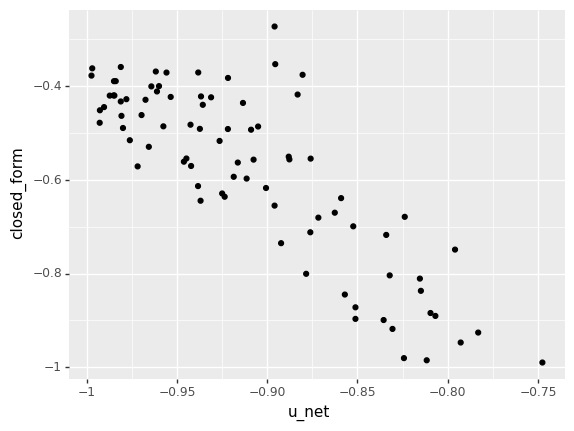

<ggplot: (8761765179969)>

time: 374 ms (started: 2022-05-21 22:14:42 +00:00)


In [54]:
# plot the fitted value function vs the closed form (ideally straight line...)
u_internal_sample = torch.cat((internal_sample, mequation.pi_net(internal_sample).reshape(-1,1)), dim=1)
u_net_results = u_net(u_internal_sample).detach().cpu().numpy().reshape(-1).tolist()
htx_results = Htx(u_internal_sample).cpu().detach().numpy().reshape(-1).tolist()
dataf2 = pd.DataFrame( { 'u_net': u_net_results, 'closed_form': htx_results } )
ggplot(dataf2, aes(x='u_net', y='closed_form')) + geom_point()

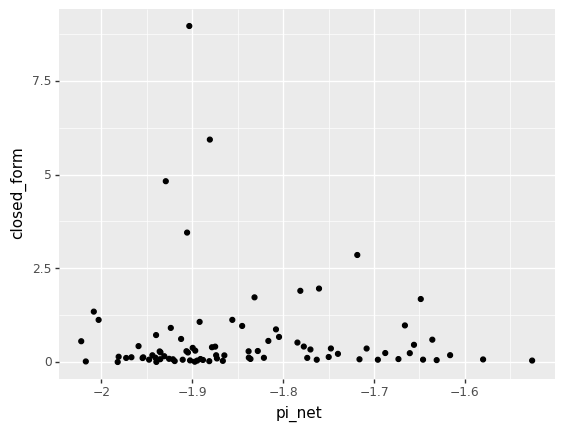

<ggplot: (8761765228977)>

time: 202 ms (started: 2022-05-21 22:14:48 +00:00)


In [55]:
# plot the control function vs the closed form (ideally straight line...)
dataf = pd.DataFrame( { 'pi_net': mequation.pi_net(internal_sample).cpu().detach().numpy().reshape(-1).tolist(), 
                       'closed_form': (((mu-r)/(gamma*(sigma**2)))*np.exp(-r*(1.0-time))).numpy().tolist() } )
ggplot(dataf, aes(x='pi_net', y='closed_form')) + geom_point()


## Stock Option reads

### Single Stock European Call option - sampling methodology




#### EuropeanOptionNet

In [ ]:
class EuropeanOptionNet(nn.Module):
    def __init__(self , NL  , NN, activation = torch.tanh  ):
        super(EuropeanOptionNet, self).__init__()
        self.NL = NL
        self.NN = NN
        ### Number of stocks + time
        ### ( t , xi)
        self.Input = 1 + 1
        self.fc_input = nn.Linear(self.Input,self.NN)
        torch.nn.init.xavier_uniform_(self.fc_input.weight)
        self.linears = nn.ModuleList([nn.Linear(self.NN, self.NN) for i in range(self.NL)])
        for i, l in enumerate(self.linears):    
            torch.nn.init.xavier_uniform_(l.weight)
        self.fc_output = nn.Linear(self.NN,1)
        torch.nn.init.xavier_uniform_(self.fc_output.weight)
        self.act = activation
        
    def forward(self, x):
        # pdb.set_trace()
        h = self.act( self.fc_input(x)  )
        for i, l in enumerate(self.linears):
            h = self.act( l(h) )
        out = self.fc_output(h)
        return out 
    

#### EuropeanBlackScholesSingleStock

In [ ]:
import math

class EuropeanBlackScholesSingleStock():
    
    def __init__(self , net, is_call = True):

        self.C = 0.0           
        self.R = 0.05         # Interest Rate (Yearly)

        self.SIGMA = 0.25  # Volatility (Yearly)
        self.RU = 1.0      # stock corrolation
        
        self.K = 50.0              # Strike Price 
        self.T = 1.0               # Maturation time (in YEAR)
        self.MAX_X = self.K*3.0   # MAX price
        ## for accept reject purpose!
        ## free boundry problems
        self.net = net
        
        self.weights = None
        self.eps = 1E9
        self.weights_tbl = []

        self.gamma = 0.0001
        self.beta = 0.0001

        self.is_call = is_call
        self.log_normal_dist = torch.distributions.LogNormal(self.R-self.C, self.SIGMA)
        self.log_normal_dist_5 = torch.distributions.LogNormal(self.R-self.C, self.SIGMA*5.0)

        self.xbreaks = None
        self.tbreaks = None


    def reset_weights(self):
        self.weights = None
        self.eps = 1E9
        self.weights_tbl = []

    def g(self , x):
        # pay off function - 1 is the stock dimension, 0 is the time dimension
        if self.is_call:
          return torch.max( x[:,1].reshape(-1,1) - self.K , torch.zeros([len(x),1]).cuda() ) 
        else:
          return torch.max( self.K - x[:,1].reshape(-1,1) , torch.zeros([len(x),1]).cuda() ) 


    def mu(self, x):
        ## should test it! output dimension is important !
        return (self.R-self.C)*x.reshape(-1,1)

    def sigma(self , x):
        return self.SIGMA*x.reshape(-1,1)

    @staticmethod
    def to_device(x, to_cpu):
      if to_cpu:
        return x.cpu()
      else:
        return x.cuda()

    def sample(self , sample_method_X = "U", size = 2**8, to_cpu = False ):
        '''
        Sampling function
        '''
        # 4 samples returned:
        # internal, boundary, initial, terminal
        if sample_method_X in ["U","UE3"] :
            range_multiplier = 3.0 if sample_method_X == "UE3" else 1.0
            # internal samples
            x = self.to_device(torch.cat(( torch.rand([size,1])*self.T , -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier) , dim = 1 ),to_cpu)
            ### Terminal time samples
            x_terminal = self.to_device(torch.cat( ( torch.zeros(size, 1) + self.T , -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier ) , dim = 1 ),to_cpu)
            ### initial time samples
            # x_initial = torch.cat( ( torch.zeros(size, 1), -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier ) , dim = 1 ).cuda()
            ### initial time samples
            x_initial = self.to_device(torch.cat( ( torch.zeros(size, 1), self.K*torch.ones( size, 1)) , dim = 1 ),to_cpu)
            ### non-zero
            stock_space = self.K*0.8*torch.rand([size, 1]) if self.is_call else self.K*(1.2 + torch.rand([size, 1]))
            x_nonzero = self.to_device(torch.cat( ( torch.rand([size,1])*self.T, stock_space ) , dim = 1 ),to_cpu)
            compare = self.net(x_nonzero) 
            mask = compare < 0
            x_nonzero = x_nonzero[mask.reshape(-1),:]
            # x_initial = torch.cat( ( torch.zeros(size, 1), -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier) , dim = 1 ).cuda()
            return x , x_terminal , x_initial, x_nonzero
    
        if sample_method_X in ["LN", "LN5"]:
            ln_dist = self.log_normal_dist_5 if sample_method_X == "LN5" else self.log_normal_dist
            # internal samples
            x = self.to_device(torch.cat(( torch.rand([size,1])*self.T , torch.maximum(ln_dist.sample((size,)).reshape(-1,1)*self.K,torch.Tensor([0.0]))   ) , dim = 1 ),to_cpu)
            ### Terminal time samples
            x_terminal = self.to_device(torch.cat( ( torch.zeros(size, 1) + self.T , torch.maximum(ln_dist.sample((size,)).reshape(-1,1)*self.K,torch.Tensor([0.0])) ) , dim = 1 ), to_cpu)
            ### initial time samples
            x_initial = self.to_device(torch.cat( ( torch.zeros(size, 1), self.K*torch.ones( size, 1)) , dim = 1 ),to_cpu)
            # x_initial = torch.cat( ( torch.zeros(size, 1),            torch.maximum(ln_dist.sample((size,)).reshape(-1,1)*self.K,torch.Tensor([0.0])) ), dim = 1 ).cuda()
            ### non-zero
            stock_space = self.K*0.8*torch.maximum(ln_dist.sample((size,)).reshape(-1,1),torch.Tensor([0.0]))  if self.is_call else self.K*(1.2 + torch.maximum(ln_dist.sample((size,)).reshape(-1,1),torch.Tensor([0.0])) )
            x_nonzero = self.to_device(torch.cat( ( torch.rand([size,1])*self.T, stock_space ) , dim = 1 ),to_cpu)
            compare = self.net(x_nonzero) 
            mask = compare < 0
            x_nonzero = x_nonzero[mask.reshape(-1),:]
            return (x , x_terminal , x_initial, x_nonzero)

        raise ValueError(f"{sample_method_X} is not a supported sampling method")
        
    def sample_stratified(self , sample_method_X = "U", size = 2**8, to_cpu = False ):

      if self.xbreaks is None and self.tbreaks is None:
        return self.sample(sample_method_X, size, to_cpu)

      internal_strata_xts = []
      terminal_strata_xts = []
      initial_strata_xts = []
      nonzero_strata_xts = []

      # pdb.set_trace()
      
      if sample_method_X in ["U","UE3"]:

          range_multiplier = 3.0 if sample_method_X == "UE3" else 1.0
          xbreaks_used = self.xbreaks[:] if self.xbreaks is not None else [0,range_multiplier*self.MAX_X]
          tbreaks_used = self.tbreaks[:] if self.tbreaks is not None else [0,self.T]
          if xbreaks_used[-1] < range_multiplier*self.MAX_X:
            xbreaks_used.append(range_multiplier*self.MAX_X)
          while xbreaks_used[0] < 0.0:
            xbreaks_used.pop(0)
          if not xbreaks_used:
            xbreaks_used = [0,range_multiplier*self.MAX_X]
          if xbreaks_used[0] > 0.0:            
            xbreaks_used.insert(0, 0.0)

          if tbreaks_used[-1] < self.T:
            tbreaks_used.append(self.T)
          xbreaks_range = xbreaks_used[-1]-xbreaks_used[0]
          tbreaks_range = tbreaks_used[-1]-tbreaks_used[0]
          
          # if len(xbreaks_used)<1:
          #   # pdb.set_trace()
          #   pass

          total_strat_processed = 0
          # internal samples
          for stratum_x_count in range(len(xbreaks_used)-1):

            num_samples_in_stratum = 0
            if len(xbreaks_used) > 2:  # x division takes priority so assign it if there is no T division
              range_ratio_x_stratum = (xbreaks_used[stratum_x_count+1]-xbreaks_used[stratum_x_count])/xbreaks_range
              num_samples_in_stratum = math.ceil(range_ratio_x_stratum*size)

            for stratum_t_count in range(len(self.tbreaks)-1):

              if num_samples_in_stratum == 0: # there is only a T division, so use it
                range_ratio_t_stratum = (tbreaks_used[stratum_t_count+1]-tbreaks_used[stratum_t_count])/tbreaks_range
                num_samples_in_stratum = math.ceil(range_ratio_t_stratum*size)
              else:
                # there is both an X and a T division, assign the number of samples uniformly, assuming same scale of X and T
                stratum_coverage_on_unit_square = \
                  ((xbreaks_used[stratum_x_count+1]-xbreaks_used[stratum_x_count])/xbreaks_range)*\
                  ((tbreaks_used[stratum_t_count+1]-tbreaks_used[stratum_t_count])/tbreaks_range)
                num_samples_in_stratum = math.ceil(stratum_coverage_on_unit_square * size)

              ### internal samples
              internal_stratum_t_sample = tbreaks_used[stratum_t_count] + torch.rand([num_samples_in_stratum,1])*(tbreaks_used[stratum_t_count+1]-tbreaks_used[stratum_t_count])
              internal_stratum_x_sample = xbreaks_used[stratum_x_count] + torch.rand([num_samples_in_stratum,1])*(xbreaks_used[stratum_x_count+1]-xbreaks_used[stratum_x_count])
              internal_stratum_xt = self.to_device(torch.cat(( internal_stratum_t_sample , internal_stratum_x_sample) , dim = 1 ),to_cpu)
              if internal_stratum_xt.numel()<1:
                pdb.set_trace()
                pass
              
              internal_strata_xts.append(internal_stratum_xt)

              ### Terminal time samples
              terminal_stratum_x_sample = xbreaks_used[stratum_x_count] + torch.rand([num_samples_in_stratum,1])*(xbreaks_used[stratum_x_count+1]-xbreaks_used[stratum_x_count])
              terminal_stratum_xt = self.to_device(torch.cat( ( torch.zeros(num_samples_in_stratum, 1) + self.T , terminal_stratum_x_sample ) , dim = 1 ),to_cpu)
              terminal_strata_xts.append(terminal_stratum_xt)

              ### initial time samples
              # x_initial = torch.cat( ( torch.zeros(size, 1), -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier ) , dim = 1 ).cuda()
              ### initial time samples
              initial_stratum_xt = self.to_device(torch.cat( ( torch.zeros(num_samples_in_stratum, 1), self.K*torch.ones( num_samples_in_stratum, 1)) , dim = 1 ),to_cpu)
              initial_strata_xts.append(initial_stratum_xt)

              ### non-zero value samples
              stratum_mapped_stock_space = None
              if self.is_call:
                stratum_mapped_stock_space = self.K*(1.0/xbreaks_used[-1])* np.array([ xbreaks_used[stratum_x_count], xbreaks_used[stratum_x_count+1]])
              else:
                stratum_mapped_stock_space = self.K + self.K*(1.0/xbreaks_used[-1])*np.array([ xbreaks_used[stratum_x_count], xbreaks_used[stratum_x_count+1]])              
              nonzero_stratum_x_sample = stratum_mapped_stock_space[0] + torch.rand([num_samples_in_stratum, 1])*(stratum_mapped_stock_space[1]-stratum_mapped_stock_space[0])
              nonzero_stratum_xt = self.to_device(torch.cat( ( torch.rand([num_samples_in_stratum,1])*self.T, nonzero_stratum_x_sample ) , dim = 1 ),to_cpu)
              compare = self.net(nonzero_stratum_xt) 
              mask = compare < 0
              nonzero_stratum_xt = nonzero_stratum_xt[mask.reshape(-1),:]
              nonzero_strata_xts.append(nonzero_stratum_xt)

              total_strat_processed += 1 

              # if len(np.where([x.numel()!=4 for x in internal_strata_xts])[0]) >0:
              #   pdb.set_trace()
              #   pass
              # if len(internal_strata_xts) == 3:
              #   pdb.set_trace() # the problem is the next one
              #   pass

          
          # x_initial = torch.cat( ( torch.zeros(size, 1), -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier) , dim = 1 ).cuda()
          return internal_strata_xts , terminal_strata_xts , initial_strata_xts, nonzero_strata_xts
    
      raise ValueError(f"{sample_method_X} is not a supported sampling method")


    def criterion(self, x , x_terminal , x_initial, x_nonzero, loss_transforms = [torch.square]):
        '''
        Loss function that helps network find solution to equation
        '''   
        # pdb.set_trace()     
        d = torch.autograd.grad(
            self.net(x), 
            x, 
            grad_outputs=torch.ones_like(self.net(x)) ,
            create_graph=True )
        dt  = d[0][:,0].reshape(-1,1)
        dx1 = d[0][:,1].reshape(-1,1)
        # du/dxdx
        dx1x1 = torch.autograd.grad(dx1, 
                                    x , 
                                    grad_outputs=torch.ones_like(dx1) ,
                                    create_graph = True)[0][:,1].reshape(-1,1)
        if loss_transforms is None:
          loss_transforms = [torch.square]
        intC = None
        terC = None
        iniC = None
        nzC = None

        if len(x) == 0:
          # print('zero batch size for domain!')
          intC = [ torch.tensor(0).cuda().float() for loss_transform in loss_transforms ] 
        else:
          # x is above the free boundary ( so immediate pay-off is positive )
          intC_loss = dt + self.mu(x[:,1])*( dx1 ) + 0.5*( (self.sigma(x[:,1])*self.sigma(x[:,1]))*dx1x1 ) - self.R*self.net(x)
          intC = [ loss_transform(intC_loss) for loss_transform in loss_transforms ] 

        # Terminal Condition - should be equal (both in- and out of the money)
        terC = [ loss_transform( self.g(x_terminal) - self.net(x_terminal) ) for loss_transform in loss_transforms ]

        # pdb.set_trace()
        # Initial Condition - should be equal (both in- and out of the money)
        # Time is time to maturity 
        initial_px_est = self.net(x_initial)
        iniC = [ loss_transform( initial_px_est - bs_price("C" if self.is_call else "P", 
                                                           torch.Tensor([self.K]), 
                                                           torch.Tensor([self.K]), 
                                                           torch.Tensor([self.T]), 
                                                           torch.Tensor([self.SIGMA]), 
                                                           torch.Tensor([self.R])).to(initial_px_est.device)  ) for \
                 loss_transform in loss_transforms ]
        # closed_form_initial_pxs = bs_price("C" if self.is_call else "P", self.K, x_initial[:,1], x_initial[:,0], torch.Tensor([self.SIGMA]).to(initial_px_est.device), self.R ).to(initial_px_est.device)
        # iniC = loss_transform( initial_px_est - closed_form_initial_pxs )

        if len(x_nonzero) == 0:
          nzC = [ torch.tensor(0).cuda().float() for loss_transform in loss_transforms ] 
        else:
          nzC = [ loss_transform(self.net(x_nonzero)) for loss_transform in loss_transforms ]
        return  intC , terC , iniC, nzC

    def calculateLoss(self, batch_x, train = True, loss_transforms = [ torch.square ], keep_batch = False):
        '''
        Helper function that Sample and Calculate loss,
        '''        
        # x , x_terminal , x_initial = self.sample(sample_method_X, size)
        x , x_terminal , x_initial, x_nonzero = batch_x
        x = Variable( x , requires_grad=True)
        Ls = self.criterion( x , x_terminal , x_initial, x_nonzero, loss_transforms = loss_transforms )
        intC , terC , iniC, nzC = Ls

        numActive = np.sum([1 if xb.numel()>0 else 0 for xb in batch_x ])
        # DOm = torch.mean(DO).detach().cpu().float().item()
        # TCm = torch.mean(TC).detach().cpu().float().item()
        # BCm = torch.mean(BC).detach().cpu().float().item()
        return_losses = []
        for lc in range(len(loss_transforms)):
          if not keep_batch:
            loss_equalWeightedByType = (1./numActive*torch.mean(intC[lc]) + 1./numActive*torch.mean(terC[lc]) + 1./numActive*torch.mean(iniC[lc]) + 1./numActive*torch.mean(nzC[lc]))
            return_losses.append( [ loss_equalWeightedByType , 
                                    1./numActive*torch.mean(intC[lc]) , 1./numActive*torch.mean(terC[lc]) , 1./numActive*torch.mean(iniC[lc]), 1./numActive*torch.mean(nzC[lc]) , 
                                    loss_equalWeightedByType ] )            
          else:
            return_losses.append( [intC.numpy(), terC.numpy(), iniC.numpy(), nzC.numpy()] )
        return return_losses

    def calculateLossUsingKLMinMax(self , batch_x , train = True, loss_transforms = [ torch.square ], keep_batch = False):
        '''
        Helper function that Samples and Calculate loss,
        This is adapted in that it changes the weights on the losses
        and the distribution of sampling to maximize the loss provided 
        the KL distance of the loss is within positive constraints
        beta represents the constraints on the weights
        gamma represents the constraints on the sampling distribution
        (each representing an upper bound the KL distribution)
        '''        
        # x , x_terminal , x_initial = self.sample(sample_method_X, size)
        x , x_terminal , x_initial, x_nonzero = batch_x
        x = Variable( x, requires_grad=True)
        Ls = self.criterion( x , x_terminal , x_initial, x_nonzero, loss_transforms = loss_transforms)
        intC , terC , iniC, nzC = Ls

        if self.weights is None:
          self.weights = torch.ones(1,len(Ls)).to(intC[0].device)/len(Ls)
        
        # print([DOt, TCt, BCt, torch.log(DOt + TCt + BCt), 1.0/self.gamma * torch.log(DOt + TCt + BCt)])

        numActive = np.sum([1 if xb.numel()>0 else 0 for xb in batch_x ])

        return_losses = []
        for lc in range(len(loss_transforms)):
          if not keep_batch:
            intCt = self.weights[0,0] * torch.pow((1.0/intC[lc].numel() if intC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.beta * intC[lc])), self.gamma/self.beta) 
            terCt = self.weights[0,1] * torch.pow((1.0/terC[lc].numel() if terC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.beta * terC[lc])), self.gamma/self.beta) 
            iniCt = self.weights[0,2] * torch.pow((1.0/iniC[lc].numel() if iniC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.beta * iniC[lc])), self.gamma/self.beta) 
            nzCt = self.weights[0,3] * torch.pow((1.0/nzC[lc].numel() if nzC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.beta * nzC[lc])), self.gamma/self.beta) 
            loss_equalWeightedByType = (1./numActive*torch.mean(intC[lc]) + 1./numActive*torch.mean(terC[lc]) + 1./numActive*torch.mean(iniC[lc]) + 1./numActive*torch.mean(nzC[lc]))
            transformed_loss = 1.0/self.gamma * torch.log(intCt + terCt + iniCt + nzCt)
            return_losses.append( [ transformed_loss , 
                                    1./numActive*torch.mean(intC[lc]) , 1./numActive*torch.mean(terC[lc]) , 1./numActive*torch.mean(iniC[lc]), 1./numActive*torch.mean(nzC[lc]) , 
                                    loss_equalWeightedByType ] )            
          else:
            return_losses.append( [intC[lc].numpy(), terC[lc].numpy(), iniC[lc].numpy(), nzC[lc].numpy()] )
        return return_losses

        # loss_equalWeightedByType = (1./numActive*torch.mean(intC) + 1./numActive*torch.mean(terC) + 1./numActive*torch.mean(iniC) + 1./numActive*torch.mean(nzC))
        # return   transformed_loss, 1./numActive*torch.mean(intC) , 1./numActive*torch.mean(terC) , 1./numActive*torch.mean(iniC) , loss_equalWeightedByType


    def calculateLossKLMinMaxGamma(self , batch_x , train = True, loss_transforms = [ torch.square ], keep_batch = False):
        '''
        Helper function that Samples and Calculate loss,
        This is adapted in that it changes the weights on the losses
        and the distribution of sampling to maximize the loss provided 
        the KL distance of the loss is within positive constraints
        beta represents the constraints on the weights
        gamma represents the constraints on the sampling distribution
        (each representing an upper bound the KL distribution)
        '''        
        # x , x_terminal , x_initial = self.sample(sample_method_X, size)
        x , x_terminal , x_initial, x_nonzero = batch_x
        x = Variable( x, requires_grad=True)
        Ls = self.criterion( x , x_terminal , x_initial, x_nonzero, loss_transforms = loss_transforms)
        intC , terC , iniC, nzC = Ls

        if self.weights is None:
          self.weights = torch.ones(1,len(Ls)).to(intC[0].device)/len(Ls)
        
        # print([DOt, TCt, BCt, torch.log(DOt + TCt + BCt), 1.0/self.gamma * torch.log(DOt + TCt + BCt)])
        numActive = np.sum([1 if xb.numel()>0 else 0 for xb in batch_x ])

        return_losses = []
        for lc in range(len(loss_transforms)):
          if not keep_batch:
            intCt = self.weights[0,0] * (1.0/intC[lc].numel() if intC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.gamma * intC[lc])) 
            terCt = self.weights[0,1] * (1.0/terC[lc].numel() if terC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.gamma * terC[lc])) 
            iniCt = self.weights[0,2] * (1.0/iniC[lc].numel() if iniC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.gamma * iniC[lc])) 
            nzCt = self.weights[0,3] * (1.0/nzC[lc].numel() if nzC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.gamma * nzC[lc])) 
            loss_equalWeightedByType = (1./numActive*torch.mean(intC[lc]) + 1./numActive*torch.mean(terC[lc]) + 1./numActive*torch.mean(iniC[lc]) + 1./numActive*torch.mean(nzC[lc]))
            transformed_loss = 1.0/self.gamma * torch.log(intCt + terCt + iniCt + nzCt)
            return_losses.append( [ transformed_loss , 
                                    1./numActive*torch.mean(intC[lc]) , 1./numActive*torch.mean(terC[lc]) , 1./numActive*torch.mean(iniC[lc]), 1./numActive*torch.mean(nzC[lc]) , 
                                    loss_equalWeightedByType ] )            
          else:
            return_losses.append( [intC[lc].numpy(), terC[lc].numpy(), iniC[lc].numpy(), nzC[lc].numpy()] )
        return return_losses

    

#### TrainEuropeanBlackScholesSingleStock

In [ ]:
class TrainEuropeanBlackScholesSingleStock():
    
    def __init__(self , net , equation , BATCH_SIZE , debug = False):
        self.history_mean_hooks = [] 
        self.history_surfaces_hooks = None       
        self.history_tl = []
        self.history_internal = []
        self.history_terminal = []
        self.history_initial = []              
        self.history_nonzero = []
        self.BATCH_SIZE = BATCH_SIZE
        self.net = net
        self.model = equation        
        self.debug = debug  
        self.hook_interval = 20      
        if self.debug == True:
            self.hooks = {}            
            self.get_all_layers(self.net)

        self.optimizer_used = optim.Adam

        self.use_early_stop = False
        self.early_stop_patience = 10
        self.early_stop_delta = 0.0        
        self.best_loss = np.Inf
        self.monitored_loss_type = "Train_L2"
        self.early_stop_counter = 0

        self.stop_epoch = 0

        self.validation_sample = None
        self.validation_losses = None
        self.train_losses = None        
        

    def train(self , epoch , lr, eqLossFn = 'calculateLoss', sample_method_X = "U", key_loss_func = torch.square, huber_delta = 0.5):
        
        self.validation_losses = np.ones((epoch, 6*3 - 1), dtype='float32') * np.nan
        self.train_losses = np.ones((epoch, 6*2 -1 ), dtype='float32') * np.nan

        optimizer = self.optimizer_used(self.net.parameters(), lr)
        # optimizer = optim.SGD(self.net.parameters(), lr)
        loss_avg = 0.0
        loss_calc_method = None
        try:
            loss_calc_method = getattr(self.model, eqLossFn)
        except AttributeError:
            raise NotImplementedError("Class `{}` does not implement `{}`".format(self.model.__class__.__name__, eqLossFn))
        
        for e in range(epoch):
            optimizer.zero_grad()
            # pdb.set_trace()
            sample_batch = self.model.sample(sample_method_X = sample_method_X, size=self.BATCH_SIZE)

            losses_L2, losses_ABS = loss_calc_method( sample_batch, loss_transforms = [ key_loss_func, torch.abs ], keep_batch = False )
            # pdb.set_trace()
            loss , internal , terminal , initial, nonzero, losses_equalWeightedByType = losses_L2
            loss_abs , internal_abs , terminal_abs , initial_abs, nonzero_abs, losses_equalWeightedByType_abs = losses_ABS
            max_loss_L2 = torch.max(torch.tensor([internal , terminal , initial, nonzero]))

            self.train_losses[e,:] = [ to_cpu_detach(loss) , to_cpu_detach(internal) , to_cpu_detach(terminal) , to_cpu_detach(initial), to_cpu_detach(nonzero), 
                                       to_cpu_detach(loss_abs) , to_cpu_detach(internal_abs) , to_cpu_detach(terminal_abs) , to_cpu_detach(initial_abs), to_cpu_detach(nonzero_abs), to_cpu_detach(losses_equalWeightedByType_abs)]

            if self.debug == True and (self.validation_sample is not None):
              losses_L2_validation, losses_ABS_validation, losses_Huber_valiation = loss_calc_method( self.validation_sample, 
                                                                                                     loss_transforms = [ torch.square, torch.abs, partial(huber_loss_zero_target, delta=huber_delta) ], 
                                                                                                     keep_batch = False )
              validation_loss_list = [*to_cpu_detach(losses_L2_validation),*to_cpu_detach(losses_ABS_validation),*to_cpu_detach(losses_Huber_valiation)]
              validation_loss_list = validation_loss_list.pop(5) # the L2 loss is duplicated at index 1
              self.validation_losses[e,:] = validation_loss_list
            
            if self.use_early_stop:
              loss_to_check = losses_equalWeightedByType
              if self.monitored_loss_type == "Train_L2":
                pass
              elif self.monitored_loss_type == "Train_L1":             
                loss_to_check = losses_equalWeightedByType_abs
              elif self.monitored_loss_type == "Train_MAXL2":             
                loss_to_check = max_loss_L2

              if loss_to_check < (self.best_loss-self.early_stop_delta):
                self.best_loss = loss_to_check
                self.early_stop_counter = 0
                # print(f"New Loss to beat for early Stop at epoch {e}, original loss: {losses_equalWeightedByType} with patience {self.early_stop_patience}")
              else:
                self.early_stop_counter += 1
              if self.early_stop_counter>=self.early_stop_patience:
                print(f"Early Stop at epoch {e}, {self.monitored_loss_type}: {loss_to_check} with patience {self.early_stop_patience}")
                break
            
            loss_avg = loss_avg + float(loss.item())
            loss.backward()

            optimizer.step()
            if (e % self.hook_interval == (self.hook_interval-1)) or e == 0:

                loss_avg = loss_avg/self.hook_interval
                print("Epoch {} - lr {} -  key loss: {} - eqWeighted loss: {} - L1 loss {} - Max Loss {}".format(e , lr , loss, losses_equalWeightedByType, loss_abs, max_loss_L2 ))

                # loss_avg = 0
                ## report detailed loss ## ## puting inside no grad??? for memory optimization!
                # tl , dl , il , bl, _ = self.model.calculateLoss( 2**6 )  # note that this is the standard loss!!

                self.history_tl.append( loss_avg )
                self.history_internal.append( internal )
                self.history_terminal.append( terminal )
                self.history_initial.append( initial )
                self.history_nonzero.append( nonzero )

                if self.debug == True and (self.validation_sample is not None):
                    mean = []
                    for l in self.hooks:
                        mean.append(torch.mean( self.hooks[l] ).item())
                    self.history_mean_hooks.append( mean )
                    xinternal, xterminal, xinitial, xnonzero = self.validation_sample
                    xinternal_res = self.model.net(xinternal).detach()
                    xterminal_res = self.model.net(xterminal).detach()
                    xinitial_res = self.model.net(xinitial).detach()
                    xnonzero_res = self.model.net(xnonzero).detach()

                    # pdb.set_trace()
                    df_internal = self.create_result_df(e, xinternal, xinternal_res, "INTERNAL")
                    df_terminal = self.create_result_df(e, xterminal, xterminal_res, "TERMINAL")
                    df_initial = self.create_result_df(e, xinitial, xinitial_res, "INITIAL")
                    df_nonzero = self.create_result_df(e, xnonzero, xnonzero_res, "NONZERO")
                    
                    if self.history_surfaces_hooks is None:
                      self.history_surfaces_hooks = pd.concat([df_internal, df_terminal, df_initial, df_nonzero],axis=0)
                    else:
                      self.history_surfaces_hooks = pd.concat([self.history_surfaces_hooks,pd.concat([df_internal, df_terminal, df_initial,df_nonzero],axis=0) ], axis=0)

        self.stop_epoch = e

    def train_stratified(self , epoch , lr, 
                         eqLossFn = 'calculateLoss', 
                         sample_method_X = "U", 
                         key_loss_func = torch.square, 
                         huber_delta = 0.5
                         ):
        
        self.validation_losses = np.ones((epoch, 6*3 - 1), dtype='float32') * np.nan
        self.train_losses = np.ones((epoch, 6*2), dtype='float32') * np.nan

        optimizer = self.optimizer_used(self.net.parameters(), lr)
        # optimizer = optim.SGD(self.net.parameters(), lr)
        loss_avg = 0.0
        loss_calc_method = None
        try:
            loss_calc_method = getattr(self.model, eqLossFn)
        except AttributeError:
            raise NotImplementedError("Class `{}` does not implement `{}`".format(self.model.__class__.__name__, eqLossFn))
        
        for e in range(epoch):
            optimizer.zero_grad()
            
            internal_xts_bts, terminal_xts_bts, initial_xts_bts, nonzero_xts_bts = self.model.sample_stratified(sample_method_X = sample_method_X, size=self.BATCH_SIZE)
            validation_stratum_losses = None #np.array([])#.reshape(1,self.validation_losses.shape[1])
            training_stratum_losses = None # np.array([])#.reshape(1,self.train_losses.shape[1])              
            
            # pdb.set_trace()
            for stratum_count in range(len(internal_xts_bts)):              
              sample_batch = (internal_xts_bts[stratum_count], 
                              terminal_xts_bts[stratum_count], 
                              initial_xts_bts[stratum_count], 
                              nonzero_xts_bts[stratum_count])  
              stratum_losses_L2, stratum_losses_ABS = loss_calc_method( sample_batch, loss_transforms = [ key_loss_func, torch.abs ], keep_batch = False )
              if np.isnan(stratum_losses_L2[0].detach().cpu().item()):
                pdb.set_trace()
                pass
              
              if training_stratum_losses is not None:
                training_stratum_losses = torch.vstack([training_stratum_losses, torch.tensor([*to_cpu_detach(stratum_losses_L2), *to_cpu_detach(stratum_losses_ABS)]) ]) 
              else:
                training_stratum_losses = torch.tensor([*to_cpu_detach(stratum_losses_L2), *to_cpu_detach(stratum_losses_ABS)], requires_grad=True)             

            training_loss_for_epoch = torch.sum(training_stratum_losses,0)

            loss , internal , terminal , initial, nonzero, losses_equalWeightedByType, \
            loss_abs , internal_abs , terminal_abs , initial_abs, nonzero_abs, losses_equalWeightedByType_abs = training_loss_for_epoch            
            max_loss_L2 = torch.max(torch.tensor([internal , terminal , initial, nonzero]))

            self.train_losses[e,:] = training_loss_for_epoch.detach().numpy()

            if self.debug == True and (self.validation_sample is not None):
              losses_L2_validation, losses_ABS_validation, losses_Huber_valiation = \
                loss_calc_method( self.validation_sample, 
                                  loss_transforms = [ torch.square, torch.abs, partial(huber_loss_zero_target, delta=huber_delta) ], 
                                  keep_batch = False )
              validation_loss = [*to_cpu_detach(losses_L2_validation),
                                              *to_cpu_detach(losses_ABS_validation),
                                              *to_cpu_detach(losses_Huber_valiation)]
              validation_loss = validation_loss.pop(5) # the L2 loss is duplicated at index 1                
              self.validation_losses[e,:] = validation_loss

            if self.use_early_stop:
              loss_to_check = losses_equalWeightedByType
              if self.monitored_loss_type == "Train_L2":
                pass
              elif self.monitored_loss_type == "Train_L1":             
                loss_to_check = losses_equalWeightedByType_abs
              elif self.monitored_loss_type == "Train_MAXL2":             
                loss_to_check = max_loss_L2
              if loss_to_check < (self.best_loss-self.early_stop_delta):
                self.best_loss = loss_to_check
                self.early_stop_counter = 0
                # print(f"New Loss to beat for early Stop at epoch {e}, original loss: {losses_equalWeightedByType} with patience {self.early_stop_patience}")
              else:
                self.early_stop_counter += 1
              if self.early_stop_counter>=self.early_stop_patience:
                print(f"Early Stop at epoch {e}, {self.monitored_loss_type}: {loss_to_check} with patience {self.early_stop_patience}")
                break
            loss_avg = loss_avg + float(loss.item())
            loss.backward()

            optimizer.step()
            if (e % self.hook_interval == (self.hook_interval-1)) or e == 0:
                loss_avg = loss_avg/self.hook_interval
                print("Epoch {} - lr {} -  key loss: {} - eqWeighted loss: {} - L1 loss {} - Max Loss {}".format(e , lr , loss, losses_equalWeightedByType, loss_abs, max_loss_L2 ))
                # loss_avg = 0
                ## report detailed loss ## ## puting inside no grad??? for memory optimization!
                # tl , dl , il , bl, _ = self.model.calculateLoss( 2**6 )  # note that this is the standard loss!!
                self.history_tl.append( loss_avg )
                self.history_internal.append( internal )
                self.history_terminal.append( terminal )
                self.history_initial.append( initial )
                self.history_nonzero.append( nonzero )
                if self.debug == True and (self.validation_sample is not None):
                    mean = []
                    for l in self.hooks:
                        mean.append(torch.mean( self.hooks[l] ).item())
                    self.history_mean_hooks.append( mean )
                    xinternal, xterminal, xinitial, xnonzero = self.validation_sample
                    xinternal_res = self.model.net(xinternal).detach()
                    xterminal_res = self.model.net(xterminal).detach()
                    xinitial_res = self.model.net(xinitial).detach()
                    xnonzero_res = self.model.net(xnonzero).detach()

                    # pdb.set_trace()
                    df_internal = self.create_result_df(e, xinternal, xinternal_res, "INTERNAL")
                    df_terminal = self.create_result_df(e, xterminal, xterminal_res, "TERMINAL")
                    df_initial = self.create_result_df(e, xinitial, xinitial_res, "INITIAL")
                    df_nonzero = self.create_result_df(e, xnonzero, xnonzero_res, "NONZERO")
                    
                    if self.history_surfaces_hooks is None:
                      self.history_surfaces_hooks = pd.concat([df_internal, df_terminal, df_initial, df_nonzero],axis=0)
                    else:
                      self.history_surfaces_hooks = pd.concat([self.history_surfaces_hooks,pd.concat([df_internal, df_terminal, df_initial,df_nonzero],axis=0) ], axis=0)

        self.stop_epoch = e


    def hook_fn(self, m, i, o):
              self.hooks[m] = o.detach()
            
    def get_all_layers(self, net):
      for name, layer in net._modules.items():
          if isinstance(layer, nn.ModuleList):
              for n , l in layer.named_children():
                l.register_forward_hook(self.hook_fn)
          else:
              # it's a non sequential. Register a hook
              layer.register_forward_hook(self.hook_fn)
    
    def create_result_df(self, e, xsample, xsample_res, sample_type):
      df_xsample = pd.DataFrame(xsample.cpu().numpy(), columns = ["Time", "S1"])
      df_xsample["Epoch"] = e
      df_xsample["Sample"] = sample_type
      df_xsample["Result"] = xsample_res.cpu().numpy()
      return df_xsample



In [ ]:
%load_ext autotime

time: 88.3 µs (started: 2022-05-12 18:40:29 +00:00)


### Gather and write data for Options

### Eu Call - graph daa



In [ ]:
EuCallModel_SL_U = EuropeanOptionNet(NL = 5, NN = 100)
bsSampler = EuropeanBlackScholesSingleStock(EuCallModel_SL_U) # we just use this for sampling
test_data = bsSampler.sample("U", 2**4, to_cpu=True)[0].detach()

# print(os.listdir(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals"))
EuCallModel_SL_U.load_state_dict(torch.load(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/EuCallSs_20220508213150_calculateLoss_U_39999_0p0001_5_100"))

print(EuCallModel_SL_U.forward(test_data).reshape(1,-1).detach().numpy())
print(bs_price("C", torch.Tensor([ bsSampler.K  ]), test_data[:,1], test_data[:,0], torch.Tensor([bsSampler.SIGMA]), bsSampler.R ))


[[8.9800308e+01 9.5424133e+01 7.8339272e+01 2.4258792e-02 9.0189537e+01
  5.6233746e+01 1.7798603e-02 5.7656673e+01 8.4578033e+01 3.6767288e+01
  2.3450342e+01 2.8047562e-02 8.8104210e+01 4.8364162e-02 4.1489244e-02
  8.2620573e+00]]
tensor([9.2890e+01, 9.8947e+01, 8.1140e+01, 0.0000e+00, 9.9221e+01, 5.7002e+01,
        0.0000e+00, 5.8736e+01, 9.0462e+01, 3.7688e+01, 2.5026e+01, 5.5379e-07,
        9.6243e+01, 1.0014e-05, 2.1134e-04, 6.0158e+00])
time: 496 ms (started: 2022-05-12 18:42:05 +00:00)


In [ ]:
def create_surface_result_df(sampled_data, exact_results, fits, sample_type):
  df = pd.DataFrame(sampled_data.cpu().detach().numpy(), columns = ["Time", "S1"])
  df["Sample"] = sample_type
  df["Estimate"] = fits.cpu().detach().numpy()
  df["Exact"] = exact_results.cpu().detach().numpy()
  return df

def get_df_fits(dir_name, title, sampled_internal_data, exact_results, model = None):
  if model is None:
    model = EuropeanOptionNet(NL = 5, NN = 100)
  model.load_state_dict(torch.load(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{dir_name}"))
  model_fits = model.forward(sampled_internal_data)
  df_model = create_surface_result_df(sampled_internal_data, exact_results, model_fits, title)
  df_model = df_model.sort_values(by=['Time','S1'], ascending=[True, True]).reset_index()
  df_model.drop(['index'], axis=1, inplace=True)
  df_model["diff"] = df_model.Estimate - df_model.Exact
  df_model['diff_abs'] = np.abs(df_model["diff"].tolist())
  df_model['perc_abs'] = np.abs(1.0 - df_model.Estimate/df_model.Exact)
  return df_model

time: 14.5 ms (started: 2022-05-12 18:44:34 +00:00)


In [ ]:
import os
from pprint import pprint as pp
pp(os.listdir(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals"))

['EuCallSs_20220508213150_calculateLoss_U_39999_0p0001_5_100',
 'EuCallSs_20220508223001_calculateLoss_LN_39999_0p0001_5_100',
 'EuCallSs_20220508230212_calculateLossUsingKLMinMax_U_39999_0p0001_5_100',
 'EuCallSs_20220508232650_calculateLossUsingKLMinMax_LN_39999_0p0001_5_100',
 'EuCallSs_Huber0p1_20220509080833_calculateLoss_U_39999_0p0001_5_100',
 'EuCallSs_Huber0p1_20220509083018_calculateLoss_LN_39999_0p0001_5_100',
 'EuCallSs_Huber0p1_20220509085253_calculateLossUsingKLMinMax_U_39999_0p0001_5_100',
 'EuCallSs_Huber0p1_20220509091521_calculateLossUsingKLMinMax_LN_39999_0p0001_5_100',
 'EuCallSs_20220510143114_calculateLossUsingKLMinMax_U_39999_0p0001_5_100_beta1p0000000000000001e-07_gamma0p0001',
 'EuCallSs_20220510145422_calculateLossUsingKLMinMax_U_39999_0p0001_5_100_beta0p0001_gamma0p0001',
 'EuCallSs_20220510151626_calculateLossUsingKLMinMax_U_39999_0p0001_5_100_beta0p0001_gamma1p0000000000000001e-07',
 'EuCallSs_20220510160809_calculateLossKLMinMaxGamma_U_39999_0p0001_5_100_b

In [ ]:
EuCallModel_SL_U = EuropeanOptionNet(NL = 5, NN = 100)
bsSampler = EuropeanBlackScholesSingleStock(EuCallModel_SL_U) # we just use this for sampling
sampled_internal_data = bsSampler.sample("U", 2**14, to_cpu=True)[0]
exact_results = bs_price("C", torch.Tensor([ bsSampler.K  ]), sampled_internal_data[:,1], sampled_internal_data[:,0], torch.Tensor([bsSampler.SIGMA]), bsSampler.R )

df_EuCallModel_SL_U = get_df_fits("EuCallSs_20220508213150_calculateLoss_U_39999_0p0001_5_100", "SL_U", sampled_internal_data, exact_results, model=EuropeanOptionNet(NL = 5, NN = 100))
df_EuCallModel_SL_LN = get_df_fits("EuCallSs_20220508223001_calculateLoss_LN_39999_0p0001_5_100", "SL_LN", sampled_internal_data, exact_results, model=EuropeanOptionNet(NL = 5, NN = 100))
df_EuCallModel_KL_U = get_df_fits("EuCallSs_20220508230212_calculateLossUsingKLMinMax_U_39999_0p0001_5_100", "KL_U", sampled_internal_data, exact_results, model=EuropeanOptionNet(NL = 5, NN = 100))
df_EuCallModel_KL_LN = get_df_fits("EuCallSs_20220508232650_calculateLossUsingKLMinMax_LN_39999_0p0001_5_100", "KL_LN", sampled_internal_data, exact_results, model=EuropeanOptionNet(NL = 5, NN = 100))

df_EuCallModel_HL_U = get_df_fits("EuCallSs_Huber0p1_20220509080833_calculateLoss_U_39999_0p0001_5_100", "HL_U", sampled_internal_data, exact_results, model=EuropeanOptionNet(NL = 5, NN = 100))
df_EuCallModel_HL_LN = get_df_fits("EuCallSs_Huber0p1_20220509083018_calculateLoss_LN_39999_0p0001_5_100", "HL_LN", sampled_internal_data, exact_results, model=EuropeanOptionNet(NL = 5, NN = 100))
df_EuCallModel_KLH_U = get_df_fits("EuCallSs_Huber0p1_20220509085253_calculateLossUsingKLMinMax_U_39999_0p0001_5_100", "KLH_U", sampled_internal_data, exact_results, model=EuropeanOptionNet(NL = 5, NN = 100))
df_EuCallModel_KLH_LN = get_df_fits("EuCallSs_Huber0p1_20220509091521_calculateLossUsingKLMinMax_LN_39999_0p0001_5_100", "KLH_LN", sampled_internal_data, exact_results, model=EuropeanOptionNet(NL = 5, NN = 100))

df_EuCallModel_KL_U_B1eM7_G1eM4 = get_df_fits("EuCallSs_20220510143114_calculateLossUsingKLMinMax_U_39999_0p0001_5_100_beta1p0000000000000001e-07_gamma0p0001", "KL_U_B1eM7_G1eM4", sampled_internal_data, exact_results, model=EuropeanOptionNet(NL = 5, NN = 100))
df_EuCallModel_KL_U_B1eM4_G1eM4 = get_df_fits("EuCallSs_20220510145422_calculateLossUsingKLMinMax_U_39999_0p0001_5_100_beta0p0001_gamma0p0001", "KL_U_B1eM4_G1eM4", sampled_internal_data, exact_results, model=EuropeanOptionNet(NL = 5, NN = 100))
df_EuCallModel_KL_U_B1eM4_G1eM7 = get_df_fits("EuCallSs_20220510151626_calculateLossUsingKLMinMax_U_39999_0p0001_5_100_beta0p0001_gamma1p0000000000000001e-07", "KL_U_B1eM4_G1eM7", sampled_internal_data, exact_results, model=EuropeanOptionNet(NL = 5, NN = 100))

df_EuCallModel_GKL_U_GO1eM4 = get_df_fits("EuCallSs_20220510160809_calculateLossKLMinMaxGamma_U_39999_0p0001_5_100_beta0p0001_gamma0p0001", "GKL_U_GO1eM4", sampled_internal_data, exact_results, model=EuropeanOptionNet(NL = 5, NN = 100))
df_EuCallModel_GKL_U_GO1eM7 = get_df_fits("EuCallSs_20220510163042_calculateLossKLMinMaxGamma_U_39999_0p0001_5_100_beta0p0001_gamma1p0000000000000001e-07", "GKL_U_GO1eM7", sampled_internal_data, exact_results, model=EuropeanOptionNet(NL = 5, NN = 100))
df_EuCallModel_GKL_U_GO1eM1 = get_df_fits("EuCallSs_20220510165222_calculateLossKLMinMaxGamma_U_39999_0p0001_5_100_beta0p0001_gamma0p1", "GKL_U_GO1eM1", sampled_internal_data, exact_results, model=EuropeanOptionNet(NL = 5, NN = 100))
df_EuCallModel_GKL_U_GO1eM3 = get_df_fits("EuCallSs_20220510180749_calculateLossKLMinMaxGamma_U_39999_0p0001_5_100_beta0p0001_gamma0p001", "GKL_U_GO1eM3", sampled_internal_data, exact_results, model=EuropeanOptionNet(NL = 5, NN = 100))


time: 1.4 s (started: 2022-05-12 19:03:49 +00:00)


In [ ]:
surface_df = pd.concat([df_EuCallModel_SL_U, df_EuCallModel_SL_LN, df_EuCallModel_KL_U, df_EuCallModel_KL_LN, 
                        df_EuCallModel_HL_U, df_EuCallModel_HL_LN, df_EuCallModel_KLH_U, df_EuCallModel_KLH_LN,
                        df_EuCallModel_KL_U_B1eM7_G1eM4, df_EuCallModel_KL_LU_B1eM4_G1eM4, df_EuCallModel_KL_LU_B1eM4_G1eM7,
                        df_EuCallModel_GKL_U_GO1eM4, df_EuCallModel_GKL_U_GO1eM7, df_EuCallModel_GKL_U_GO1eM1, df_EuCallModel_GKL_U_GO1eM3
                        ], axis=0)

time: 20.7 ms (started: 2022-05-12 19:07:36 +00:00)


In [ ]:
surface_df.to_csv(f"{paper_name}_EuCallss_{datetime.datetime.now():%Y%m%d}.csv", index=False)

time: 1.72 s (started: 2022-05-12 19:10:18 +00:00)


In [ ]:
# print(df_EuCallModel_SL_U[df_EuCallModel_SL_U.Exact>0.1].sort_values(by='perc_abs', ascending=False).head(20))
# print(df_EuCallModel_KL_U[df_EuCallModel_KL_U.Exact>0.1].sort_values(by='perc_abs', ascending=False).head(20))
# print(df_EuCallModel_SL_LN[df_EuCallModel_SL_LN.Exact>0.1].sort_values(by='perc_abs', ascending=False).head(20))
# print(df_EuCallModel_KL_LN[df_EuCallModel_KL_LN.Exact>0.1].sort_values(by='perc_abs', ascending=False).head(20))

time: 929 µs (started: 2022-05-12 19:04:08 +00:00)


In [ ]:
# ### R Code

# require(ggplot2)
# require(ggthemes)
# require(data.table)
# require(dplyr)
# require(interp)
# require(gridExtra)
# require(ggpubr)

# setwd("/Users/hansroggeman/Code/dgm")
# eucall_data = fread("dgm_lossfunctional_EuCallss.csv")


# get_diff_abs_display <- function(data, interval=1.0) {
#   #establish the min and max of scale
#   grandmin <- 0.0
#   grandmax <- ceiling(max(data$diff_abs))
#   #define the number of breaks.  In this case 8 +1
#   mybreaks <- seq(grandmin, grandmax, length.out = grandmax/interval)
#   #Function to return the desired number of colors
#   mycolors<- function(x) {
#     colors<-colorRampPalette(c("darkblue","dodgerblue","green","yellow","orange","darkred" ))( grandmax/interval )
#     colors[1:x]
#   }
#   #Function to create labels for legend
#   breaklabel <- function(x, breaks = mybreaks){
#     labels<- paste0(sapply( breaks[1:(length(breaks)-1)], function(x) {  as.character(round(x,1))   }), "-",
#                     sapply( breaks[2:length(breaks)], function(x) {  as.character(round(x,1))   }) )
#     labels[1:x]
#   }
#   return(list(grandmin, grandmax, mybreaks, mycolors, breaklabel))
# }

# diff_abs_list = get_diff_abs_display(eucall_data)
# diff_abs_breaks = diff_abs_list[[3]]
# diff_abs_colorf = diff_abs_list[[4]]
# diff_abs_lblsf = diff_abs_list[[5]]

# get_display_params <- function(data, column_name = "diff_abs", interval=1.0) {
#   #establish the min and max of scale
#   grandmin <- floor(min(data[,get(column_name)]))
#   grandmax <- ceiling(max(data[,get(column_name)]))
#   #define the number of breaks.  In this case 8 +1
#   mybreaks <- seq(grandmin, grandmax, length.out = grandmax/interval)
#   #Function to return the desired number of colors
#   mycolors<- function(x) {
#     colors<-colorRampPalette(c("darkblue","dodgerblue","green","yellow","orange","darkred" ))( grandmax/interval )
#     colors[1:x]
#   }
#   #Function to create labels for legend
#   breaklabel <- function(x, breaks = mybreaks){
#     labels<- paste0(sapply( breaks[1:(length(breaks)-1)], function(x) {  as.character(round(x,1))   }), "-",
#                     sapply( breaks[2:length(breaks)], function(x) {  as.character(round(x,1))   }) )
#     labels[1:x]
#   }
#   return(list(grandmin, grandmax, mybreaks, mycolors, breaklabel))
# }


# # ggplot(sample_n(eucall_data[(Exact>0.0) & (Sample=="SL_U")],1000), aes(x=Time, y=S1, z=perc_abs)) + geom_contour()
# # ggplot(data, aes(x, y, z = z1)) +
# #   geom_contour_filled(breaks= mybreaks, show.legend = TRUE) +
# #   scale_fill_manual(palette=mycolors, values=breaklabel(8), name="Value", drop=FALSE) +
# #   theme(legend.position = "right")

# contour_log10_perc_abs <- function(d1, title_str, palette = "Spectral") {
#   d1$perc_abs = log10(d1$perc_abs)
#   grid <- with(d1, interp::interp(Time, S1, perc_abs))
#   griddf <- subset(data.frame(Time = rep(grid$x, nrow(grid$z)),
#                               S1 = rep(grid$y, each = ncol(grid$z)),
#                               perc_abs = as.numeric(grid$z)),
#                    !is.na(perc_abs))
#   p<- ggplot(griddf, aes(Time, S1, z = perc_abs)) +
#     geom_contour_filled(colour = "white", show.legend = T) +
#     scale_fill_brewer(palette = palette, direction = -1) +
#     theme_fivethirtyeight() + ggtitle(title_str)
#   return(p)
# }

# get_legend<-function(myggplot){
#   tmp <- ggplot_gtable(ggplot_build(myggplot))
#   leg <- which(sapply(tmp$grobs, function(x) x$name) == "guide-box")
#   legend <- tmp$grobs[[leg]]
#   return(legend)
# }

# contour_diff_abs <- function(d1, title_str, breaks, palette, breaklabels, show.legend = FALSE) {
#   grid <- with(d1, interp::interp(Time, S1, diff_abs))
#   griddf <- subset(data.frame(Time = rep(grid$x, nrow(grid$z)),
#                               S1 = rep(grid$y, each = ncol(grid$z)),
#                               diff_abs = as.numeric(grid$z)),
#                    !is.na(diff_abs))
#   p<- ggplot(griddf, aes(Time, S1, z = diff_abs)) +
#     geom_contour_filled(colour = "white", breaks=breaks, show.legend = show.legend) +
#     scale_fill_manual(palette=palette, values=breaklabels, name="diff_abs", drop=FALSE) +
#     # scale_fill_brewer(palette = palette, direction = -1) +
#     ggtitle(title_str)
#   return(p)
# }

# contour_column <- function(column_name, d1, title_str, breaks, palette, breaklabels, show.legend = FALSE) {
#   grid <- with(d1, interp::interp(Time, S1, get(column_name)))
#   griddf <- subset(data.table(Time = rep(grid$x, nrow(grid$z)),
#                               S1 = rep(grid$y, each = ncol(grid$z)),
#                               column_name = as.numeric(grid$z)),!is.na(eval(column_name)))
#   griddf[,eval(column_name):=column_name]
#   griddf[,column_name:=NULL]
#   p <- ggplot(griddf, aes(Time, S1, z = get(column_name))) +
#     geom_contour_filled(colour = "white", breaks=breaks, show.legend = show.legend) +
#     scale_fill_manual(palette=palette, values=breaklabels, name=column_name, drop=FALSE) +
#     # scale_fill_brewer(palette = palette, direction = -1) +
#     ggtitle(title_str)
#   return(p)
# }

# SL_U_Acc_perc_abs = contour_log10_perc_abs(eucall_data[(Exact>0.0) & (Sample=="SL_U")], "European Call, log(10) percentage difference - Adam on L2 Loss, Uniform Sampling")
# SL_LN_Acc_perc_abs = contour_log10_perc_abs(eucall_data[(Exact>0.0) & (Sample=="SL_LN")], "European Call, log(10) percentage difference - Adam on L2 Loss, LN Sampling")
# KL_U_Acc_perc_abs = contour_log10_perc_abs(eucall_data[(Exact>0.0) & (Sample=="KL_U")], "European Call, log(10) percentage difference - Adam on KL(L2) Loss, Uniform Sampling")
# KL_LN_Acc_perc_abs = contour_log10_perc_abs(eucall_data[(Exact>0.0) & (Sample=="KL_LN")], "European Call, log(10) percentage difference - Adam on KL(L2) Loss, LN Sampling")

# SL_U_Acc_diff_abs = contour_diff_abs(eucall_data[(Exact>0.0) & (Sample=="SL_U")],
#                                      "European Call, ABS difference - Adam on L2 Loss, Uniform Sampling",
#                                      palette=diff_abs_colorf,
#                                      breaks=diff_abs_breaks, breaklabels = diff_abs_lblsf(length(diff_abs_breaks)-1))
# SL_LN_Acc_diff_abs = contour_diff_abs(eucall_data[(Exact>0.0) & (Sample=="SL_LN")], "European Call, ABS difference - Adam on L2 Loss, LN Sampling",
#                                       palette=diff_abs_colorf,
#                                       breaks=diff_abs_breaks, breaklabels = diff_abs_lblsf(length(diff_abs_breaks)-1))
# KL_U_Acc_diff_abs = contour_diff_abs(eucall_data[(Exact>0.0) & (Sample=="KL_U")], "European Call, ABS difference - Adam on KL(L2) Loss, Uniform Sampling",
#                                      palette=diff_abs_colorf,
#                                      breaks=diff_abs_breaks, breaklabels = diff_abs_lblsf(length(diff_abs_breaks)-1))
# KL_LN_Acc_diff_abs = contour_diff_abs(eucall_data[(Exact>0.0) & (Sample=="KL_LN")], "European Call, ABS difference - Adam on KL(L2) Loss, LN Sampling",
#                                       palette=diff_abs_colorf,
#                                       breaks=diff_abs_breaks, breaklabels = diff_abs_lblsf(length(diff_abs_breaks)-1))

# diff_abs_legend = get_legend(contour_diff_abs(eucall_data[(Exact>0.0) & (Sample=="SL_U")],
#                             "European Call, ABS difference - Adam on L2 Loss, Uniform Sampling",
#                             palette=diff_abs_colorf,
#                             breaks=diff_abs_breaks, 
#                             breaklabels = diff_abs_lblsf(length(diff_abs_breaks)-1), 
#                             show.legend=T))
# blankPlot <- ggplot()+geom_blank(aes(1,1)) + cowplot::theme_nothing()


# eucall_data[, `SL_U_KL_U_diff_abs`:={ mean(.SD[Sample=="SL_U",diff_abs]-.SD[Sample=="KL_U",diff_abs]) },
#                by=list(S1,Time)]
# eucall_data[, `SL_LN_KL_LN_diff_abs`:={ mean(.SD[Sample=="SL_LN",diff_abs]-.SD[Sample=="KL_LN",diff_abs]) },
#             by=list(S1,Time)]
# eucall_data[, `HL_LN_KLH_LN_diff_abs`:={ mean(.SD[Sample=="HL_LN",diff_abs]-.SD[Sample=="KLH_LN",diff_abs]) },
#             by=list(S1,Time)]
# eucall_data[, `SL_U_HL_U_diff_abs`:={ mean(.SD[Sample=="SL_U",diff_abs]-.SD[Sample=="HL_U",diff_abs]) },
#             by=list(S1,Time)]

# disp_pr = get_display_params(eucall_data, "SL_U_HL_U_diff_abs", 0.1)
# SL_U_HL_U_diff_abs_breaks = disp_pr[[3]]
# SL_U_HL_U_diff_abs_colorf = disp_pr[[4]]
# SL_U_HL_U_diff_abs_lblsf = disp_pr[[5]]

# p_SL_U_HL_U_diff_abs_l = 
#   contour_column(  "SL_U_HL_U_diff_abs",
#                     distinct(eucall_data[(Exact>0.0) & (Sample=="KL_LN"), .(Time, S1,SL_U_HL_U_diff_abs)]), 
#                     "European Call, difference - L2 vs. HL, U Sampling",
#                     palette=SL_U_HL_U_diff_abs_colorf,
#                     breaks=SL_U_HL_U_diff_abs_breaks, 
#                     breaklabels = SL_U_HL_U_diff_abs_lblsf(length(SL_U_HL_U_diff_abs_breaks)-1),
#                     show.legend = T )
# p_SL_U_Acc_diff_abs_l = 
#   contour_diff_abs( eucall_data[(Exact>0.0) & (Sample=="SL_U")],
#                     "European Call, ABS difference - Adam on L2 Loss, Uniform Sampling",
#                     palette=diff_abs_colorf,
#                     breaks=diff_abs_breaks, 
#                     breaklabels = diff_abs_lblsf(length(diff_abs_breaks)-1),
#                     show.legend = T )

# ggarrange(
#   p_SL_U_HL_U_diff_abs_l, p_SL_U_Acc_diff_abs_l,
#   common.legend = FALSE, legend = "bottom"
# )

# ggarrange(
#   SL_U_Acc_diff_abs, SL_LN_Acc_diff_abs,
#   common.legend = TRUE, legend = "bottom"
# )

# ggarrange(
#   SL_U_Acc_diff_abs, SL_LN_Acc_diff_abs,
#   common.legend = TRUE, legend = "bottom"
# )

# ggarrange(
#   SL_U_Acc_diff_abs, KL_U_Acc_diff_abs,
#   common.legend = TRUE, legend = "bottom"
# )

# # ggarrange(
# #   ggarrange(SL_U_Acc_diff_abs, SL_LN_Acc_diff_abs, ncol = 2),                # First row with line plot
# #   # Second row with box and dot plots
# #   ggarrange(KL_U_Acc_diff_abs, KL_LN_Acc_diff_abs, ncol = 2),
# #   nrow = 2,
# #   common.legend = TRUE
# # )



# # grid.arrange(diff_abs_legend, blankPlot,  SL_U_Acc_diff_abs, SL_LN_Acc_diff_abs,
# #              ncol=2, nrow = 2,
# #              widths = c(2.7, 2.7), heights = c(0.5, 2.5))


# # grid.arrange(SL_U_Acc_diff_abs, SL_LN_Acc_diff_abs, diff_abs_legend, ncol=3, widths=c(2.3, 2.3, 0.4))

# # grid.arrange(SL_U_Acc_diff_abs,SL_LN_Acc_diff_abs,KL_U_Acc_diff_abs,KL_LN_Acc_diff_abs, nrow=1, ncol=4)

# # grid.arrange(SL_U_Acc_diff_abs,SL_LN_Acc_diff_abs,KL_U_Acc_diff_abs, nrow=1, ncol=3)
# # grid.arrange(SL_U_Acc_diff_abs,SL_LN_Acc_diff_abs,nrow=1,ncol=2)





In [ ]:
# from matplotlib.mlab import griddata
# import matplotlib.pyplot as plt

# # First we'll make a regular grid to interpolate onto
# data = df_EuCallModel_SL_U.copy()

# numcols, numrows = 30, 30
# xi = np.linspace(data.Time.min(), data.Time.max(), numcols)
# yi = np.linspace(data.S1.min(), data.S1.max(), numrows)
# xi, yi = np.meshgrid(xi, yi)

# #-- Interpolate at the points in xi, yi
# # "griddata" expects "raw" numpy arrays, so we'll pass in
# # data.x.values instead of just the pandas series data.x
# x, y, z = data.Time.values, data.S1.values, data.delta.values
# zi = griddata(x, y, z, xi, yi)

# #-- Display the results
# fig, ax = plt.subplots()
# im = ax.contourf(xi, yi, zi)
# ax.scatter(data.Time, data.S1, c=data.delta, s=100,
#            vmin=zi.min(), vmax=zi.max())
# fig.colorbar(im)


# #  ggplot(df_EuCallModel_SL_U, aes('Time', 'S1', z = 'delta')) + geom_contour()

ImportError: ignored